# British Airways Flight Booking Prediction

### Here is the background information on your task

- Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

- This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

- With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

### Here is your task

1. Explore and prepare the dataset

    First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task.

2. Train a machine learning model

    When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

3. Evaluate model and present findings

    After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

It is recommended that the analysis portion of this task is done in Python.

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import joblib
# import pickle

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


#### Load Dataset (Jupyter Notebook)

In [2]:
# df = pd.read_csv('customer_booking.csv', encoding='Latin1')

#### Load Dataset (Jupyter Notebook)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Personal Projects/British Airways Flight Booking Prediction/customer_booking.csv', encoding='Latin1')

# Descriptive Statistics

In [5]:
#Checking dataframe samples
df.sample(10)

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
17673               1      Internet  RoundTrip             25              63   
14443               1        Mobile  RoundTrip             22              91   
45778               9      Internet  RoundTrip            161               6   
19738               1      Internet  RoundTrip             47              38   
34295               1      Internet  RoundTrip              7               4   
73                  1      Internet  RoundTrip            198             207   
40484               3      Internet  RoundTrip             33               5   
12495               4      Internet     OneWay            308              17   
35253               1      Internet  RoundTrip              6               5   
45265               2      Internet  RoundTrip            355               6   

       flight_hour flight_day   route booking_origin  wants_extra_baggage  \
17673            2        Fri  KTMPEN       Malaysia                    1   
14443           22        Sun  ICNSYD      Australia                    1   
45778           22        Thu  DPSPVG          China                    1   
19738           15        Wed  MELSGN      Australia                    1   
34295            0        Wed  PENSYD      Australia                    1   
73              10        Sun  AKLKIX          Japan                    1   
40484            1        Wed  LGKPEK          China                    1   
12495           22        Sun  HNDMEL      Australia                    1   
35253            5        Wed  BKIICN       Malaysia                    1   
45265            2        Mon  DPSICN    South Korea                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
17673                     0                      0             4.75   
14443                     0                      0             8.58   
45778                     0                      0             5.33   
19738                     1                      1             8.83   
34295                     1                      1             8.58   
73                        0                      1             7.00   
40484                     0                      1             6.42   
12495                     0                      1             8.83   
35253                     1                      0             6.62   
45265                     0                      0             6.62   

       booking_complete  
17673                 0  
14443                 0  
45778                 1  
19738                 0  
34295                 0  
73                    0  
40484                 0  
12495                 0  
35253                 0  
45265                 0

In [6]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
#Checking missing values
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [8]:
#Checking if there is any duplicated values
df.duplicated().any()

True

In [9]:
#Checking amount of duplicated values
df.duplicated().sum()

719

In [10]:
#Checking significance of duplicated values to dataset
df.duplicated().sum() / df.shape[0] * 100

1.438

In [11]:
#Drop duplicated values keeping only the first occurance
df.drop_duplicates(inplace=True)

In [12]:
#Grouping columns based on their types

nums = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

cats = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [13]:
#Numerical description
df.describe().transpose()

count       mean        std   min    25%    50%  \
num_passengers         49281.0   1.590187   1.016538  1.00   1.00   1.00   
purchase_lead          49281.0  84.723281  90.410229  0.00  21.00  51.00   
length_of_stay         49281.0  23.053976  33.832149  0.00   5.00  17.00   
flight_hour            49281.0   9.070676   5.413099  0.00   5.00   9.00   
wants_extra_baggage    49281.0   0.668229   0.470854  0.00   0.00   1.00   
wants_preferred_seat   49281.0   0.295631   0.456331  0.00   0.00   0.00   
wants_in_flight_meals  49281.0   0.426635   0.494593  0.00   0.00   0.00   
flight_duration        49281.0   7.279974   1.496390  4.67   5.62   7.57   
booking_complete       49281.0   0.149977   0.357052  0.00   0.00   0.00   

                          75%    max  
num_passengers           2.00    9.0  
purchase_lead          115.00  867.0  
length_of_stay          28.00  778.0  
flight_hour             13.00   23.0  
wants_extra_baggage      1.00    1.0  
wants_preferred_seat     1.00    1.0  
wants_in_flight_meals    1.00    1.0  
flight_duration          8.83    9.5  
booking_complete         0.00    1.0

In [14]:
#Categorical description
df.describe(exclude=['int64', 'float64']).transpose()

count unique        top   freq
sales_channel   49281      2   Internet  43917
trip_type       49281      3  RoundTrip  48779
flight_day      49281      7        Mon   7988
route           49281    799     AKLKUL   2620
booking_origin  49281    104  Australia  17691

In [15]:
#Categorical feature value counts
for col in cats :
  print(f'Value counts untuk {col} :')
  print(df[col].value_counts(), '\n')

Value counts untuk sales_channel :
Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64 

Value counts untuk trip_type :
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64 

Value counts untuk flight_day :
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: flight_day, dtype: int64 

Value counts untuk route :
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64 

Value counts untuk booking_origin :
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, 

# Univariate Analysis

## Numerical Columns

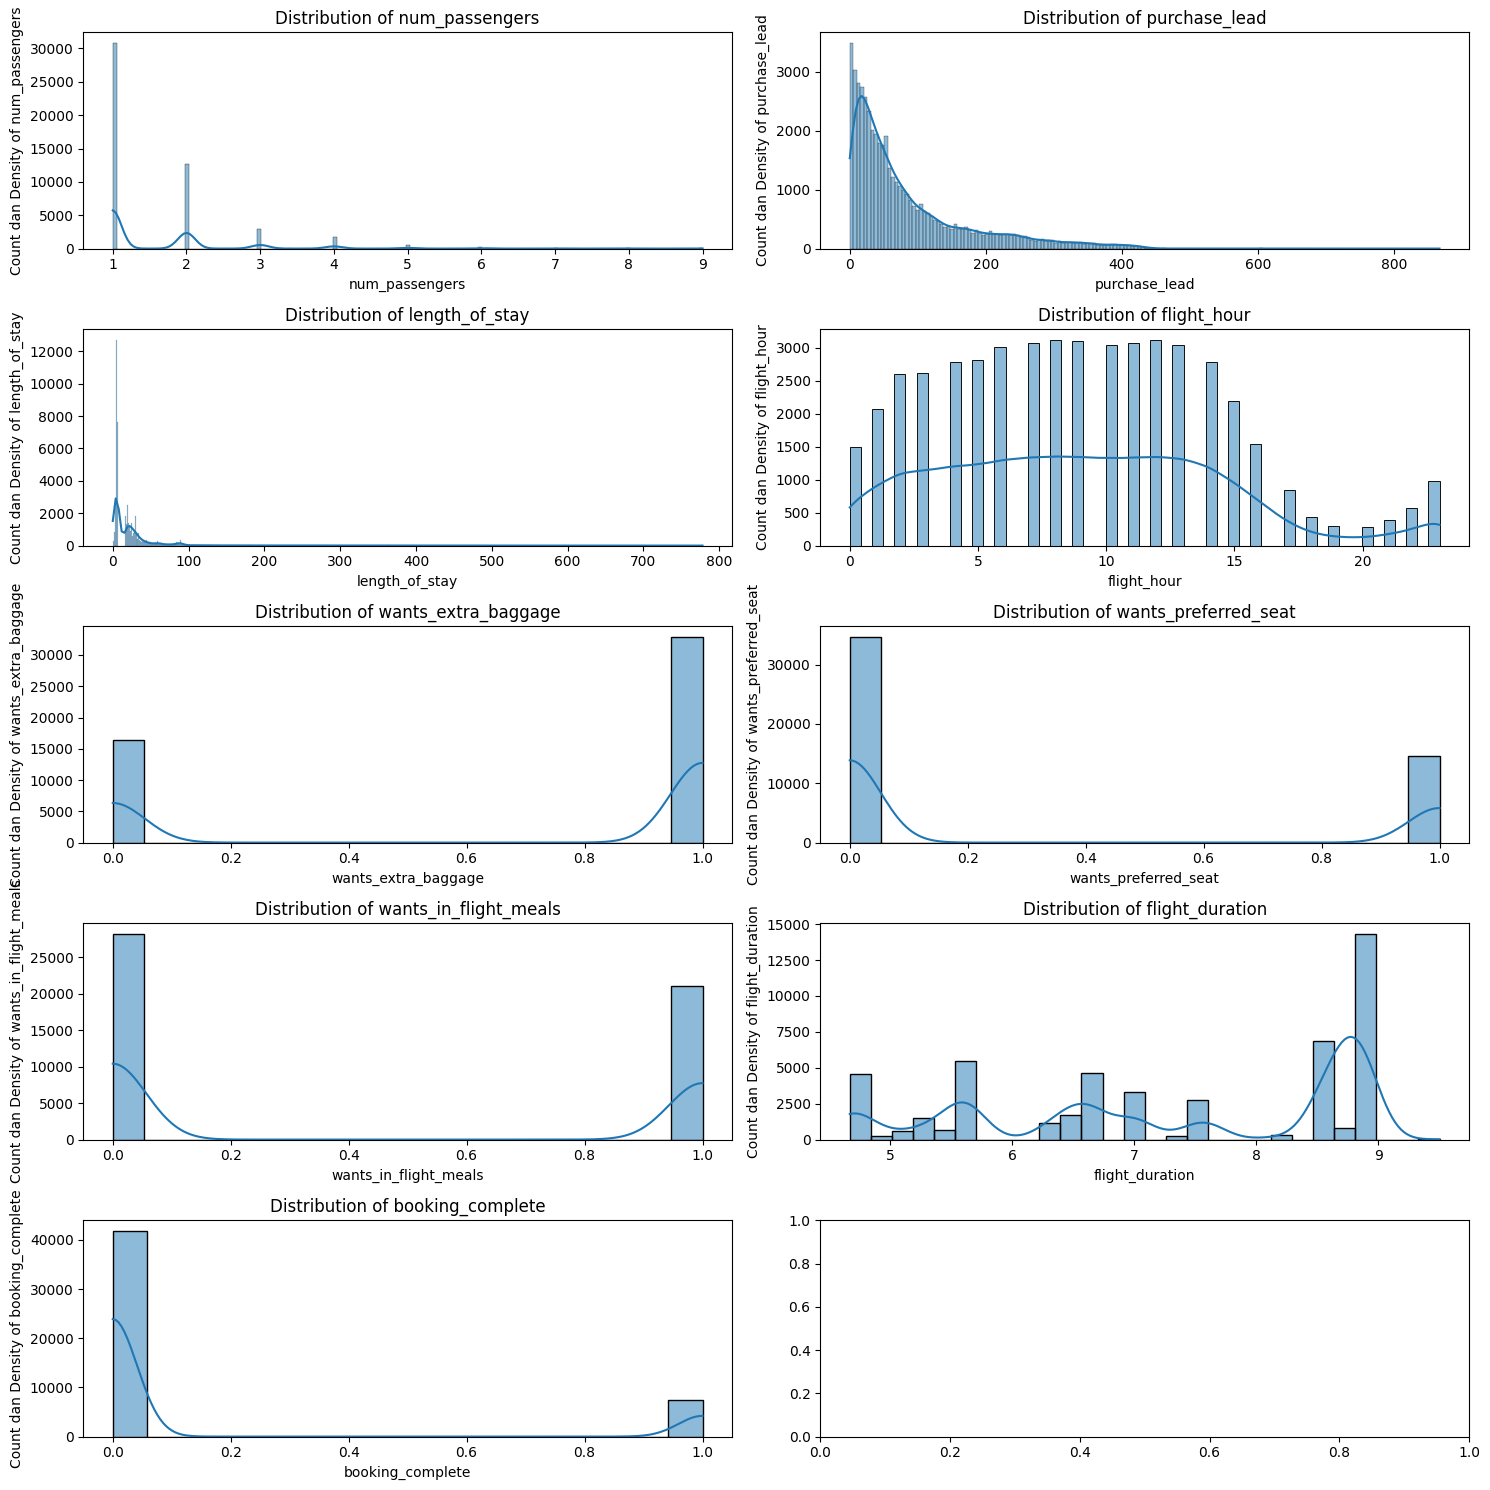

In [16]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.histplot(ax=axes[i], x=df[nums[i]], kde=True)
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

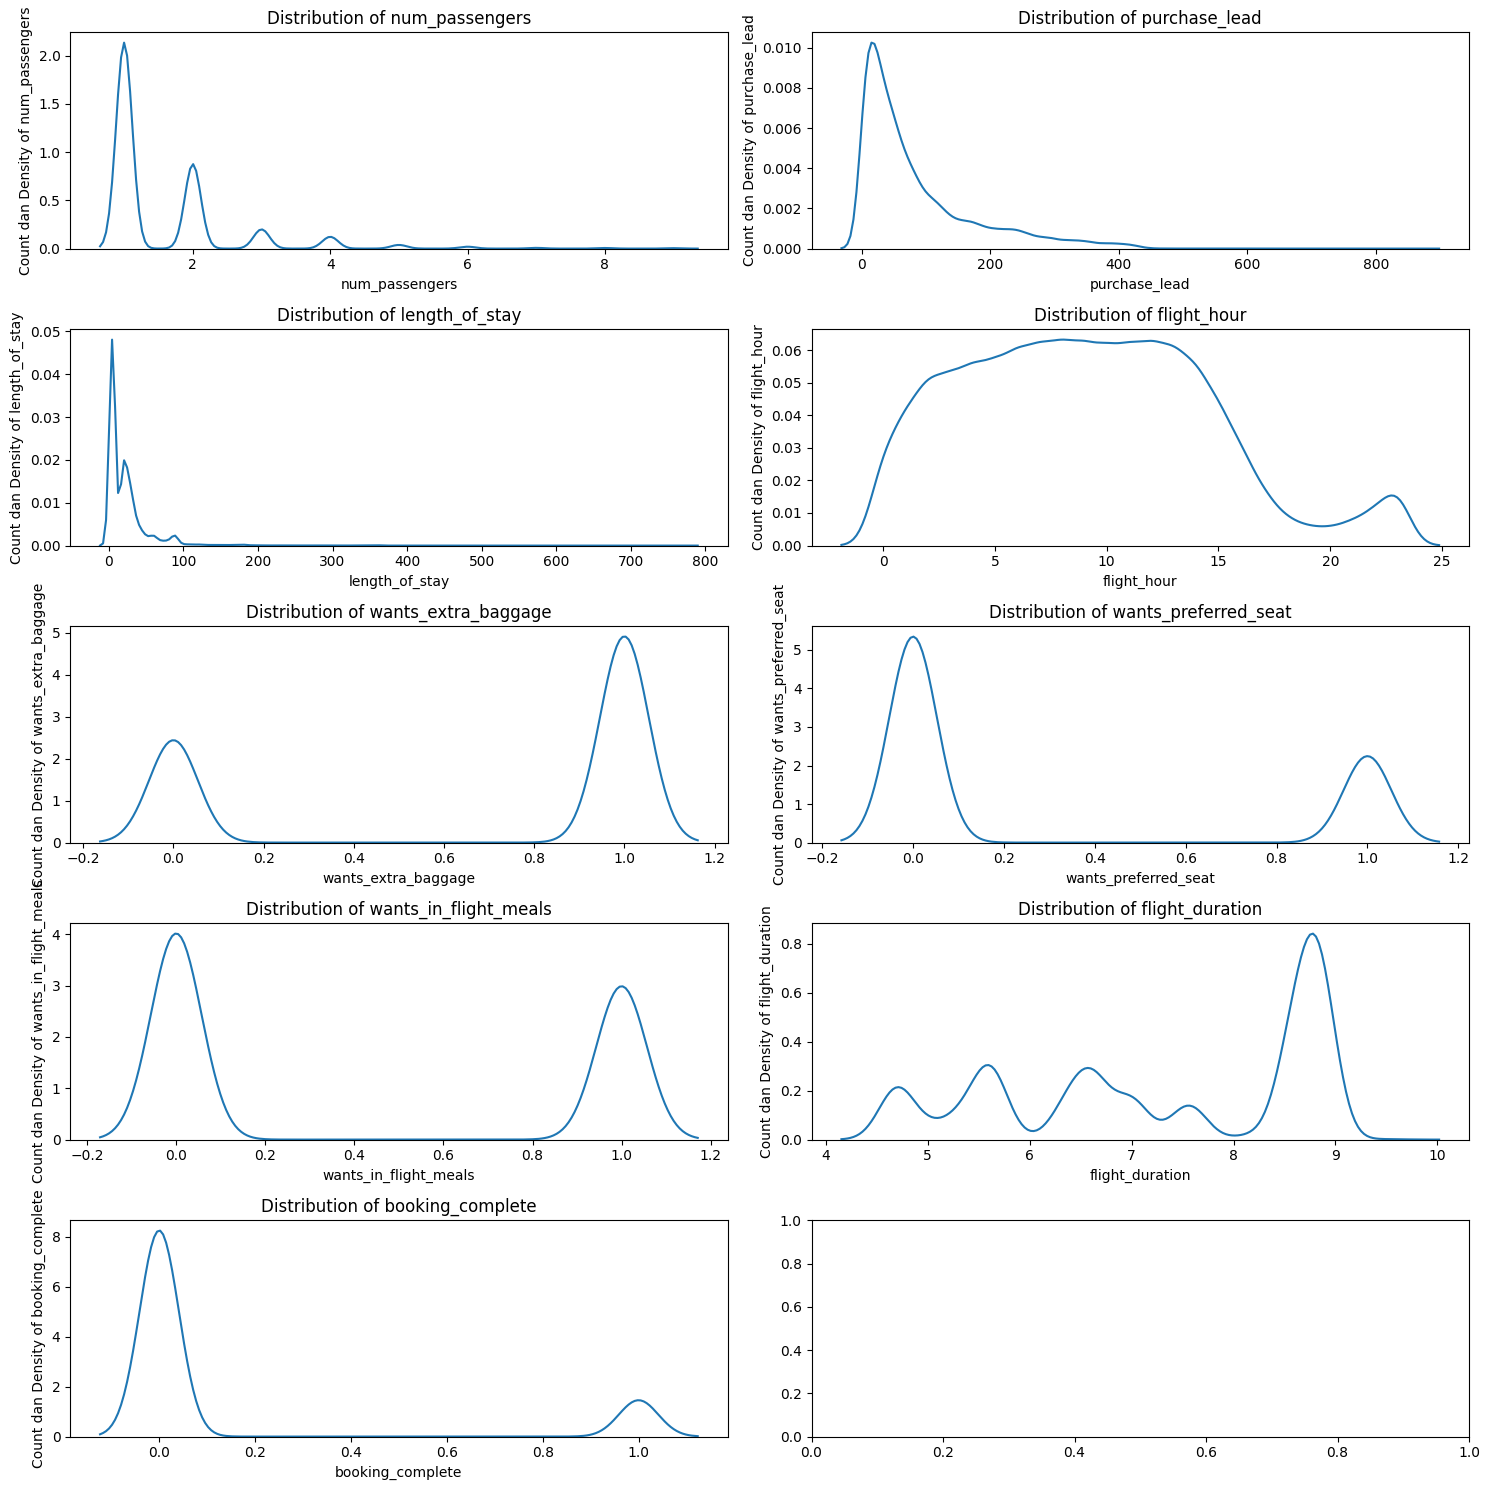

In [17]:
# Focusing on kde
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(ax=axes[i], x=df[nums[i]])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

The distribution of several categorical features are bimodal, while for the num_passengers, purchase_lead and lenght_of_stay have positive/right skewed distribution, we will filter this whether using standarization or log transformation

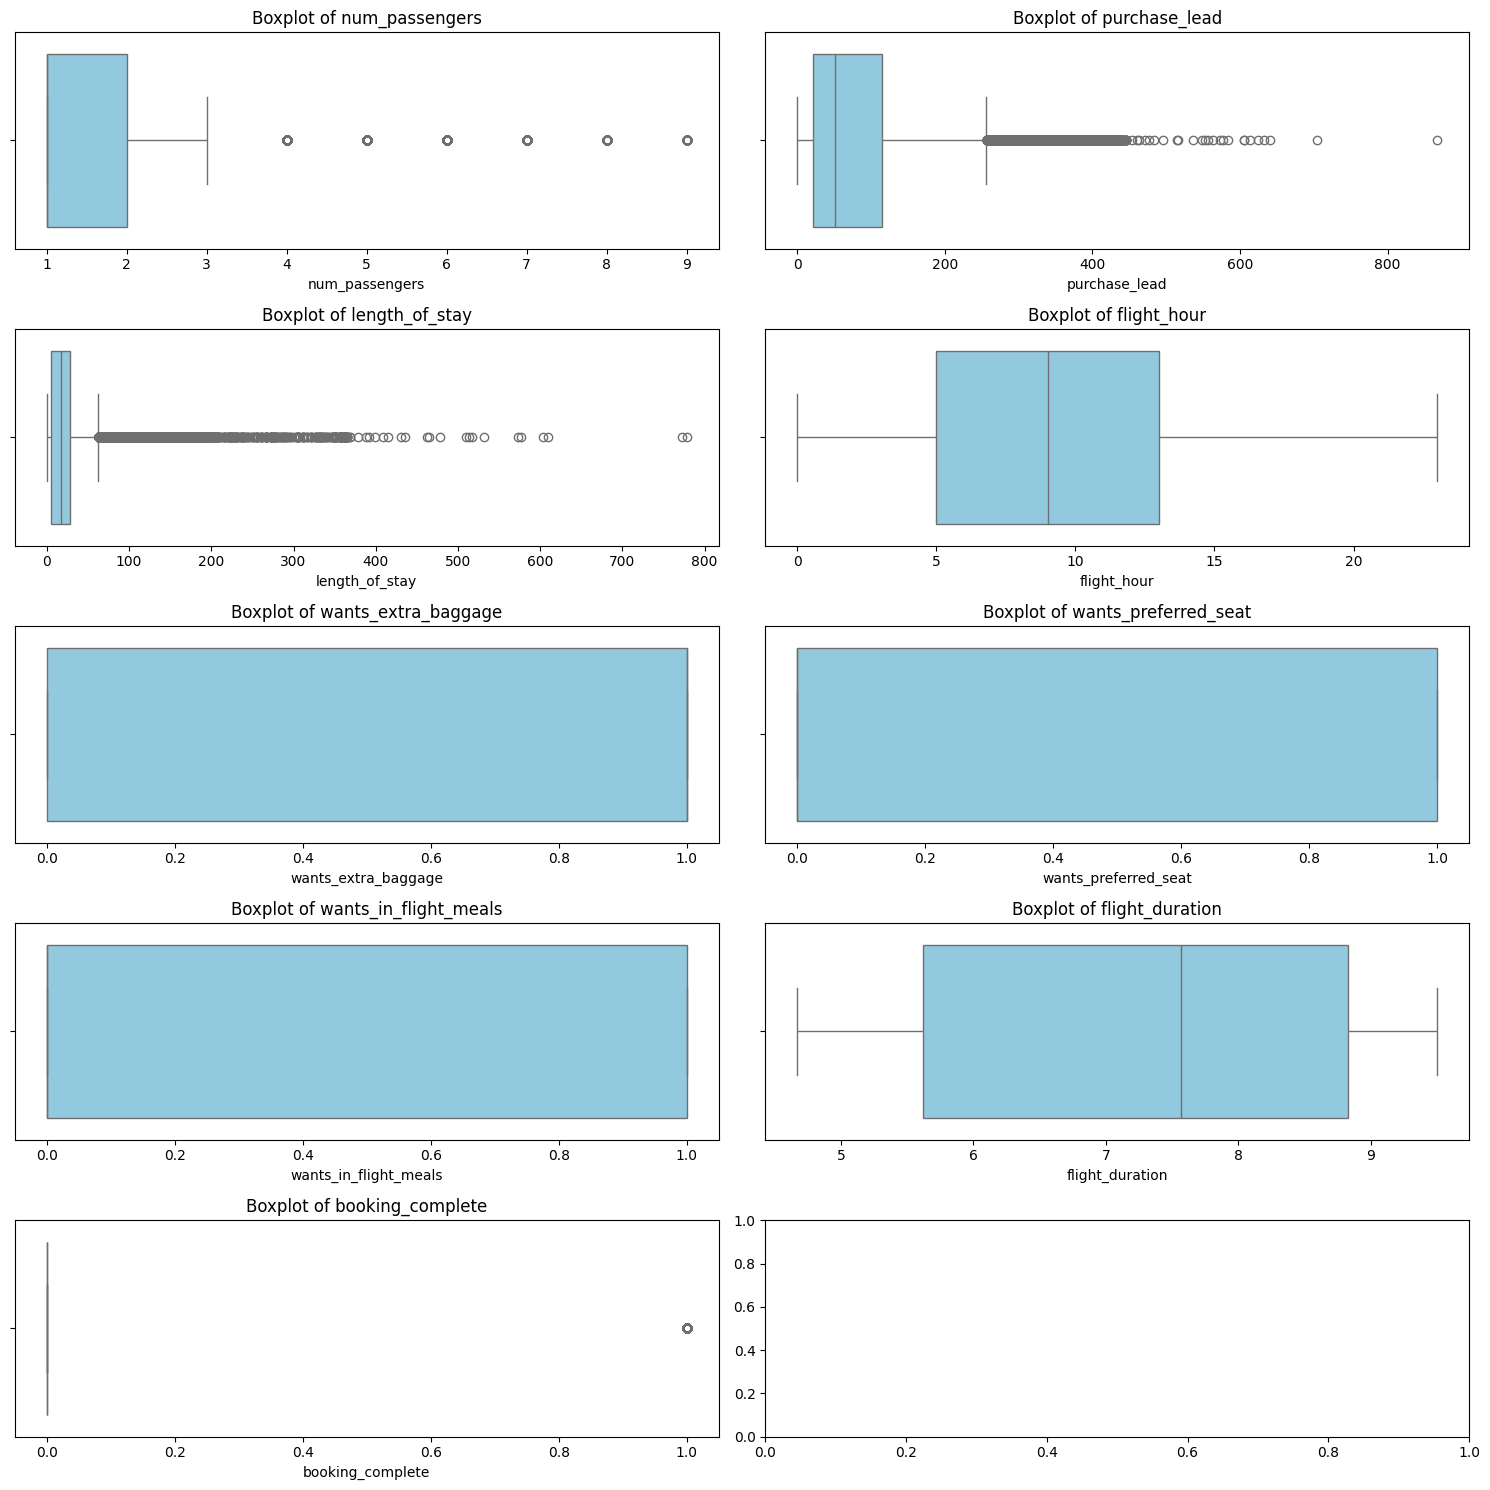

In [18]:
# Boxplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

First we can see that there are quite amount of outliers in num_passengers, purchase_lead and lenght_of_stay feature, so we might filter them later using IQR or Z-Score

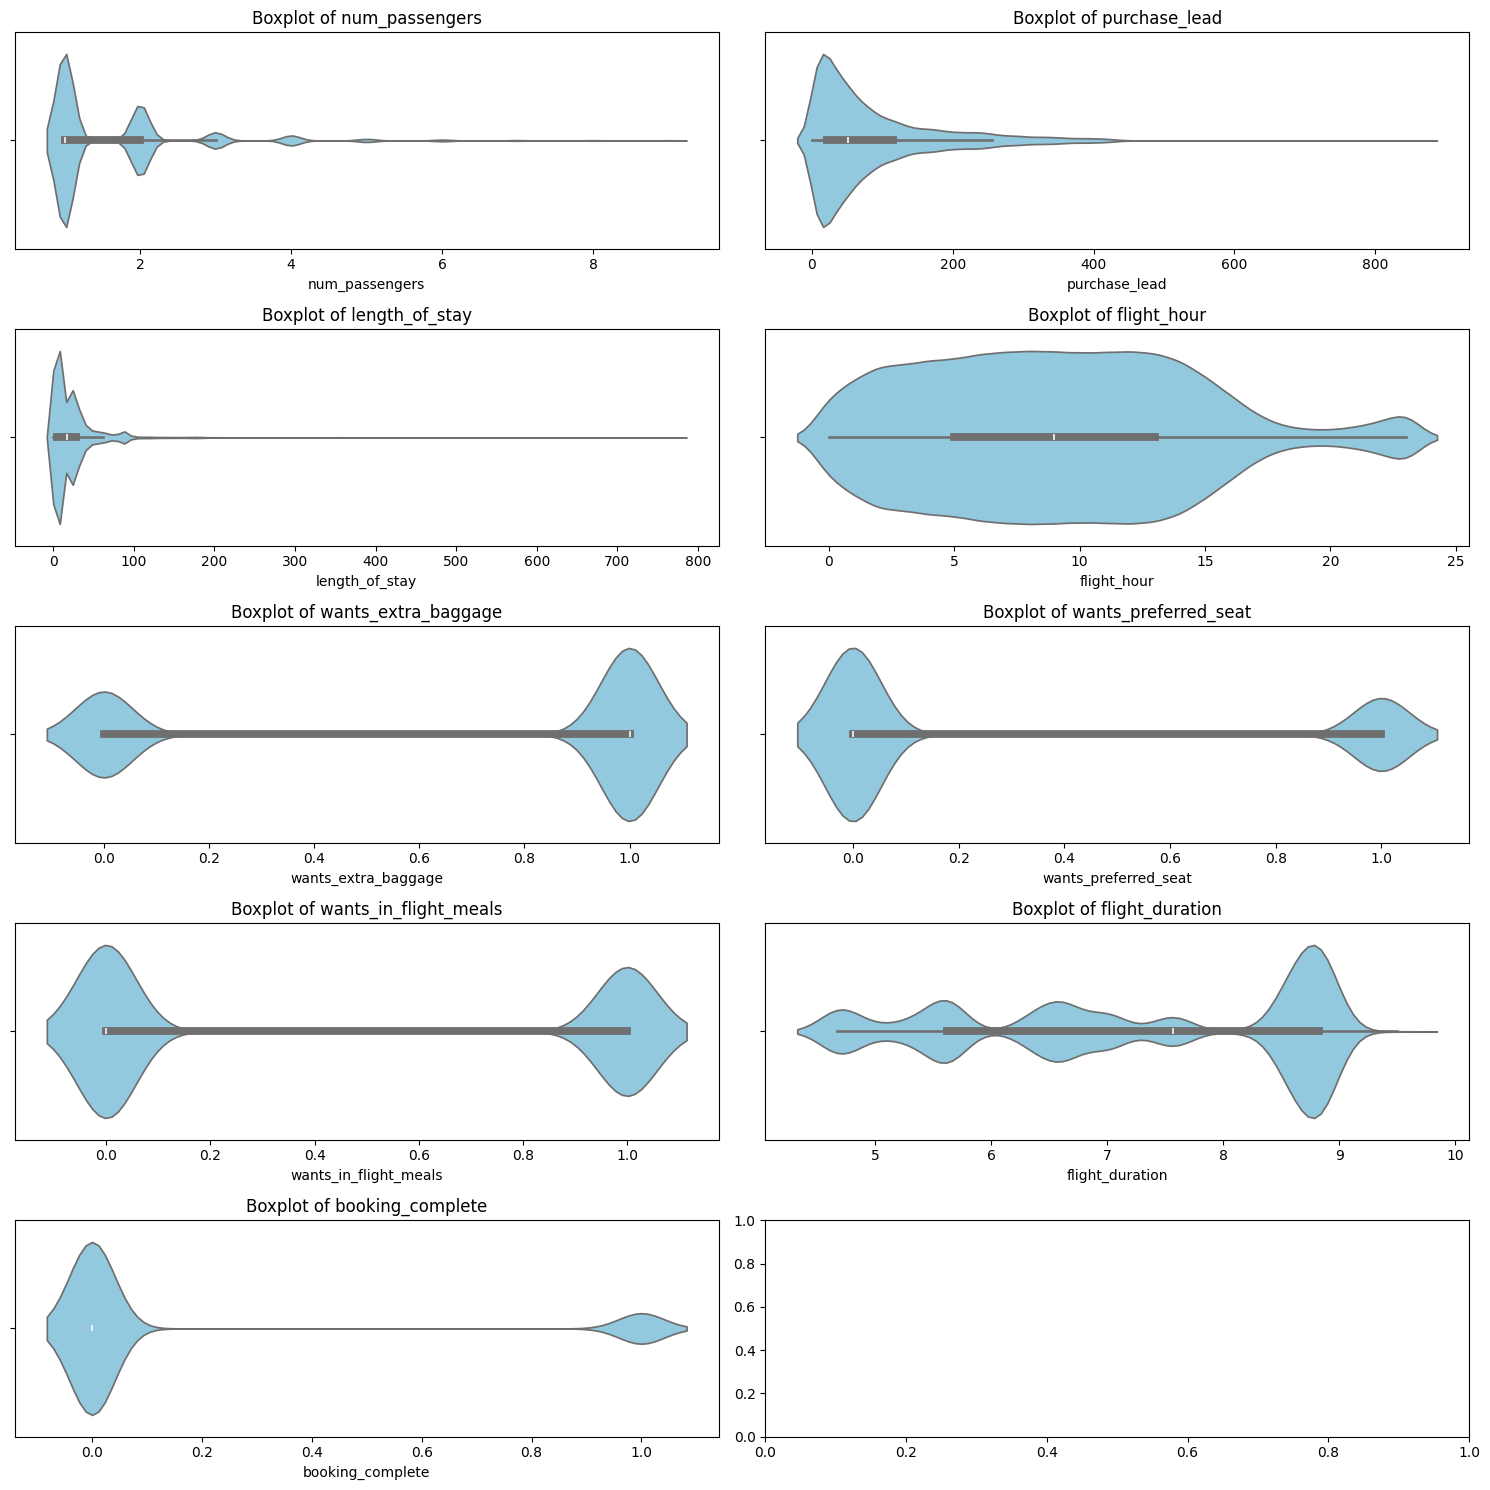

In [19]:
# Violinplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

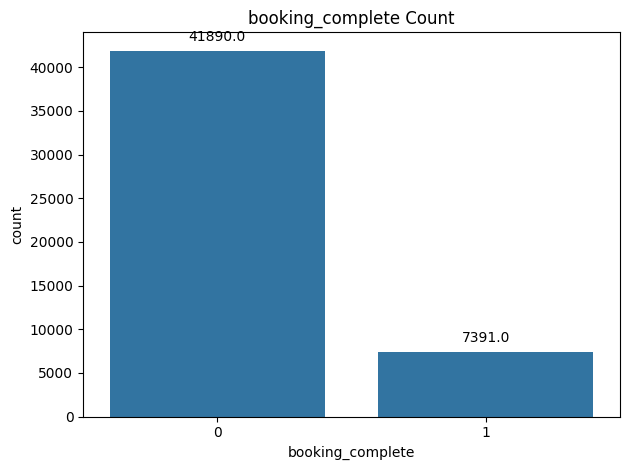

In [20]:
# Univariate booking_complete Only
ax = sns.countplot(data=df, x='booking_complete')

# Annotation of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('booking_complete Count')
plt.tight_layout()
plt.show()

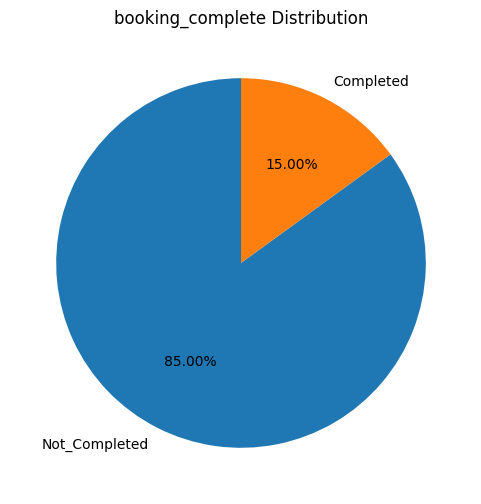

In [21]:
# Creating a pie chart with percentages
plt.figure(figsize=(6, 6))
plt.pie(df['booking_complete'].value_counts(), labels=['Not_Completed', 'Completed'], autopct='%1.2f%%', startangle=90)
plt.title('booking_complete Distribution')

plt.show()

As we can that there is quite an class imbalance case here, where the values completed (1) only have 14.96% of total dataset. So in this case we might use sampling method later

## Categorical Columns

In [22]:
df[cats].columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

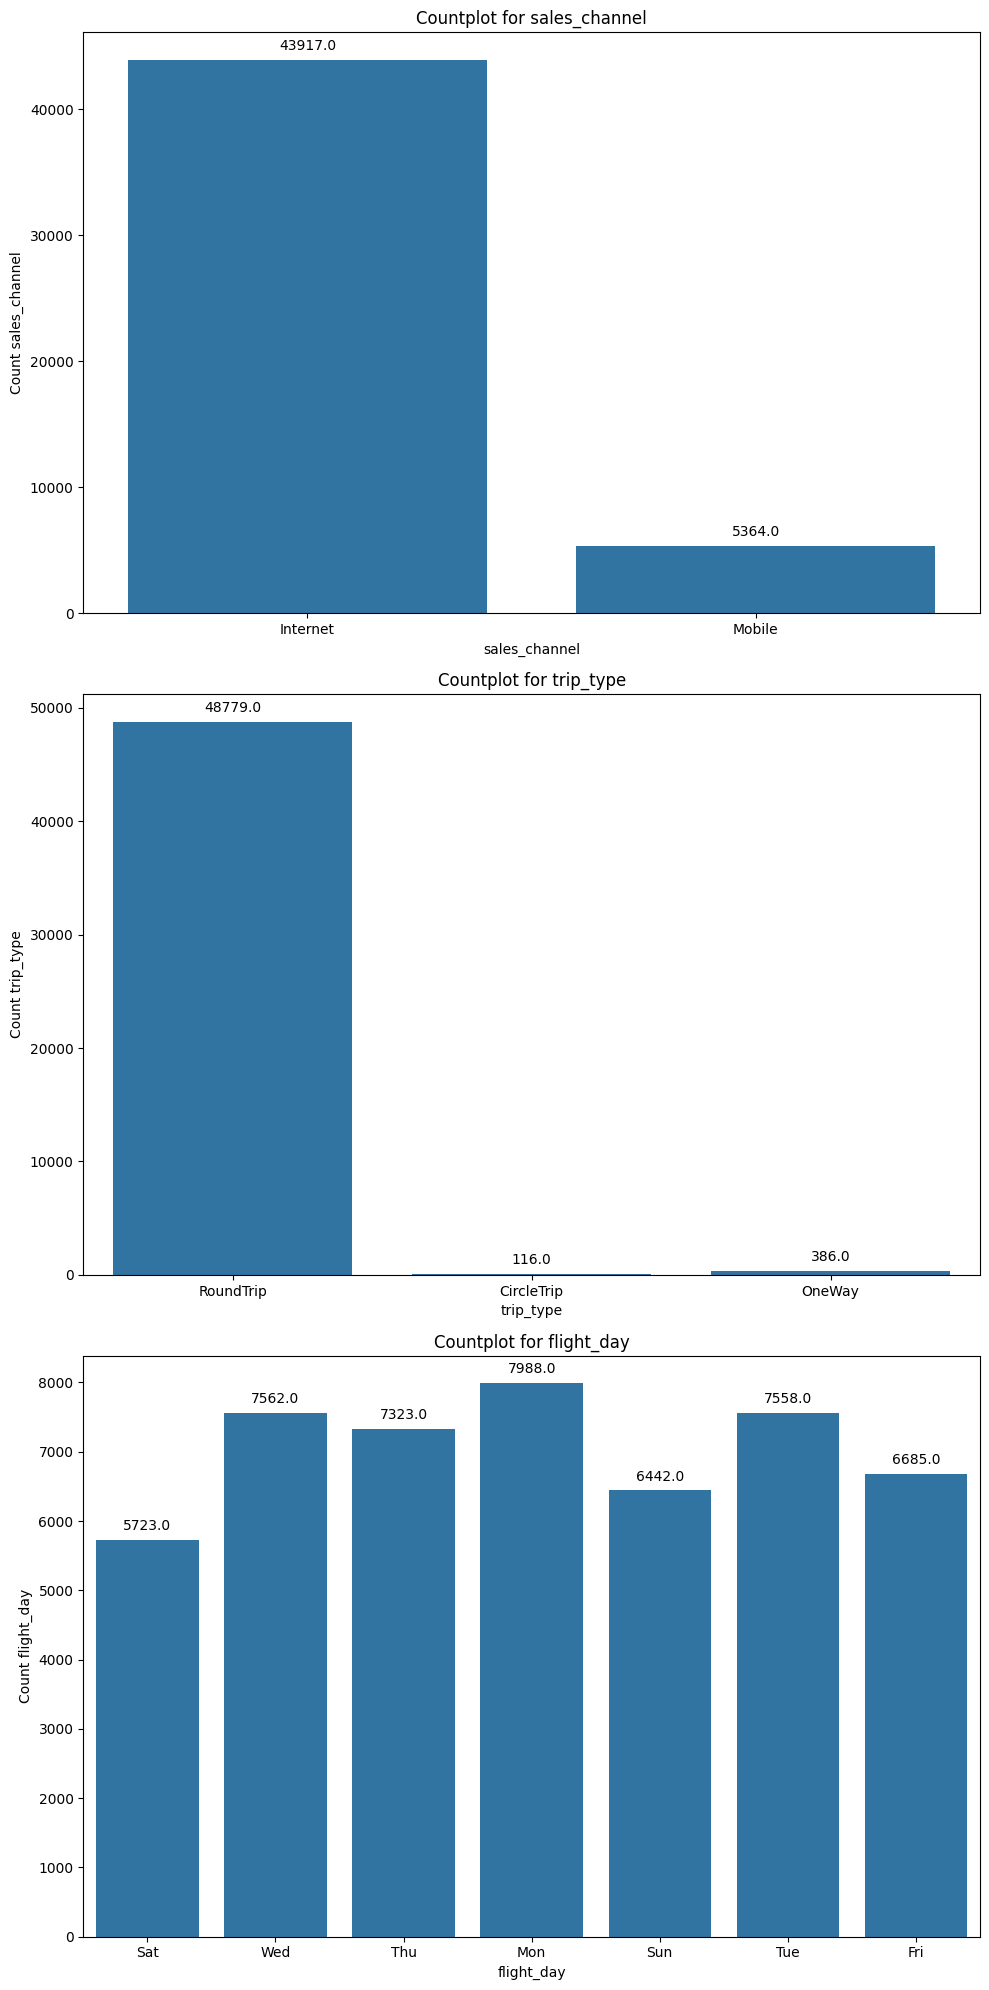

In [23]:
# Categorical Countplot (few unique values)
cats_few = ['sales_channel', 'trip_type', 'flight_day']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(ax=axes[i], x=df[cats_few[i]])
    axes[i].set_title(f'Countplot for {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is quite an imbalance in the values of feature sales_channel and trip_type where one category overwhelm the others, we will see it with hue of booking_complete later in the bivariate analysis

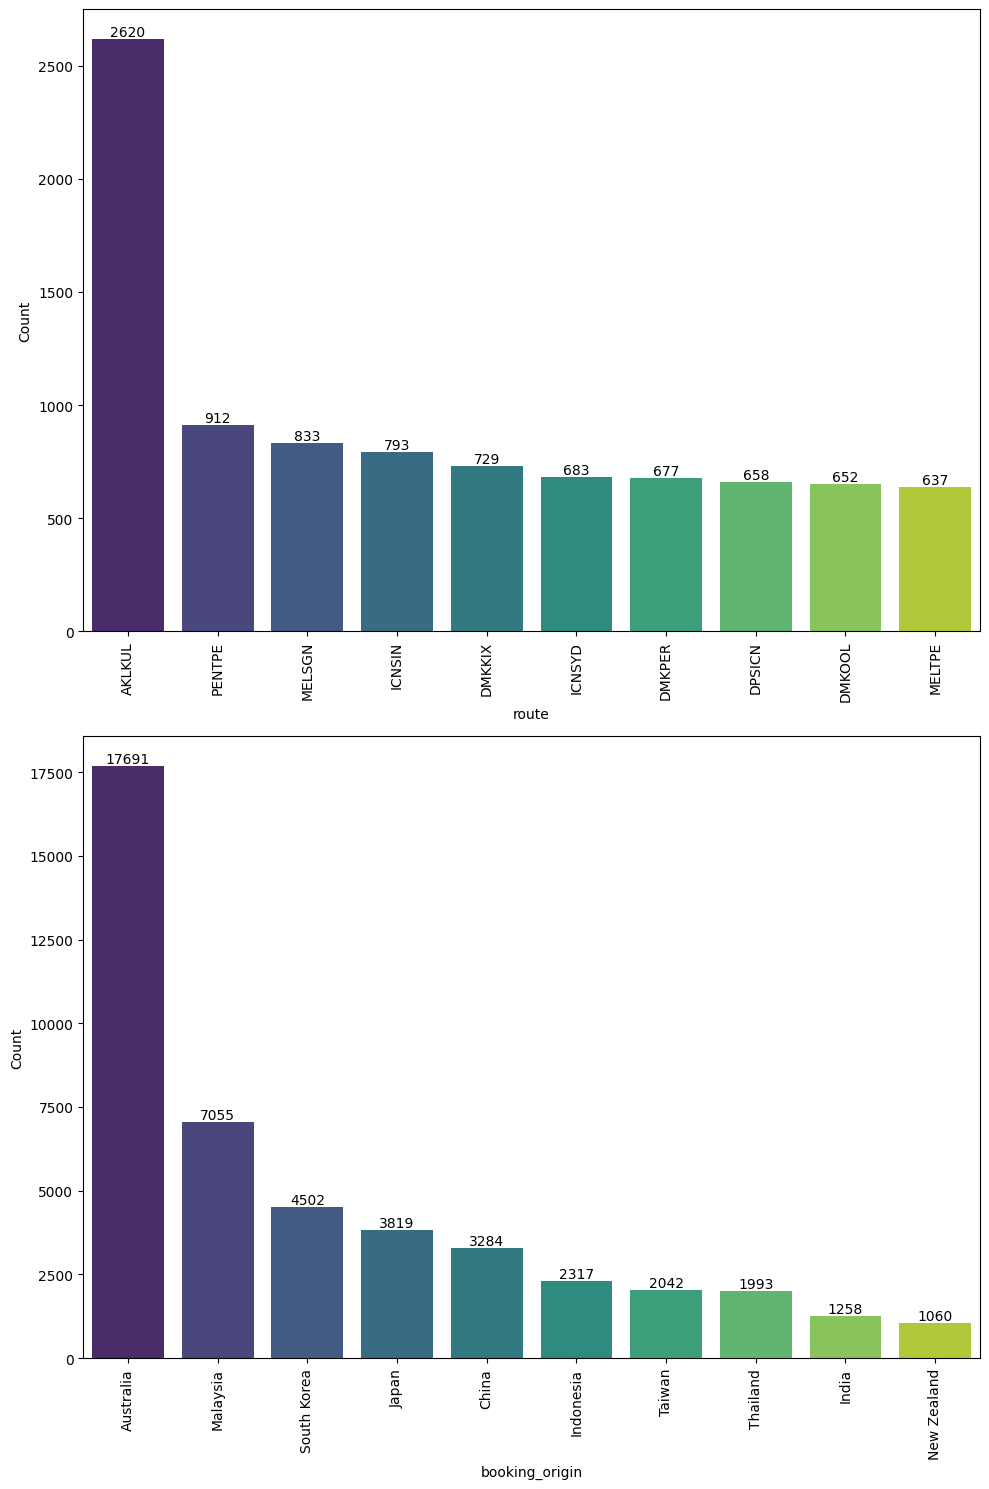

In [24]:
# Categorical Countplot (many unique values)
cats_many = ['route', 'booking_origin']
plt.figure(figsize=(10, 15))

for i in range(len(cats_many)):
    plt.subplot(len(cats_many), 1, i+1)
    top_10_data = df[cats_many[i]].value_counts().head(10)

    # Create countplot
    sns.barplot(x=top_10_data.index, y=top_10_data.values, palette='viridis')

    # Add count values on top of each bar
    for index, value in enumerate(top_10_data.values):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel(cats_many[i])
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

For categorical feature with many unique values since it is almost impossible to see the entire visualization, we will only make it top 10 or bottom 10

# Bivariate/Multivariate Analysis

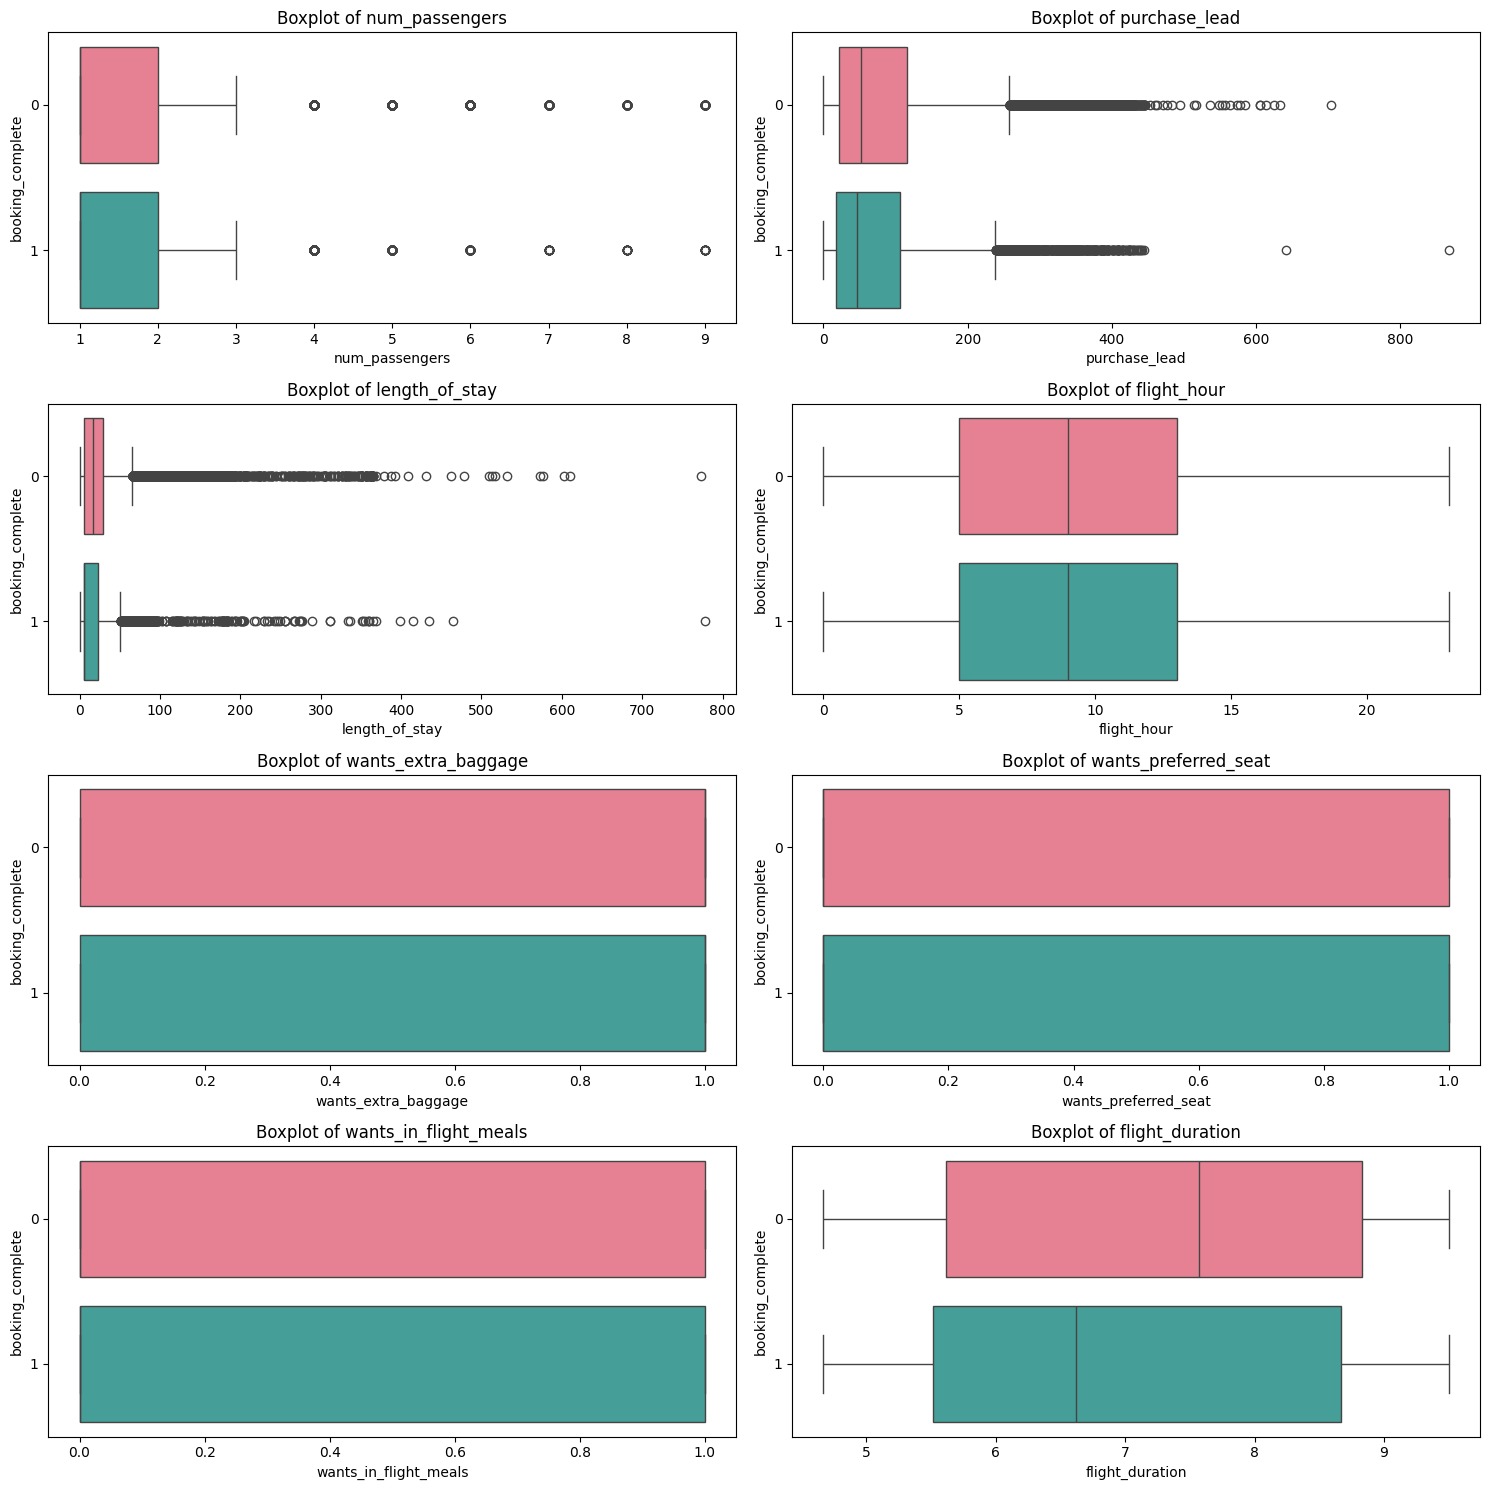

In [25]:
#Boxplot with hue booking_complete

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

nums_bivariate = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
palette = sns.color_palette("husl", df['booking_complete'].nunique())


for i in range(len(nums_bivariate)) :
  sns.boxplot(ax=axes[i], x=df[nums_bivariate[i]], y=df['booking_complete'], orient='h', color='skyblue', palette=palette)
  axes[i].set_title(f'Boxplot of {nums_bivariate[i]}')

plt.tight_layout()

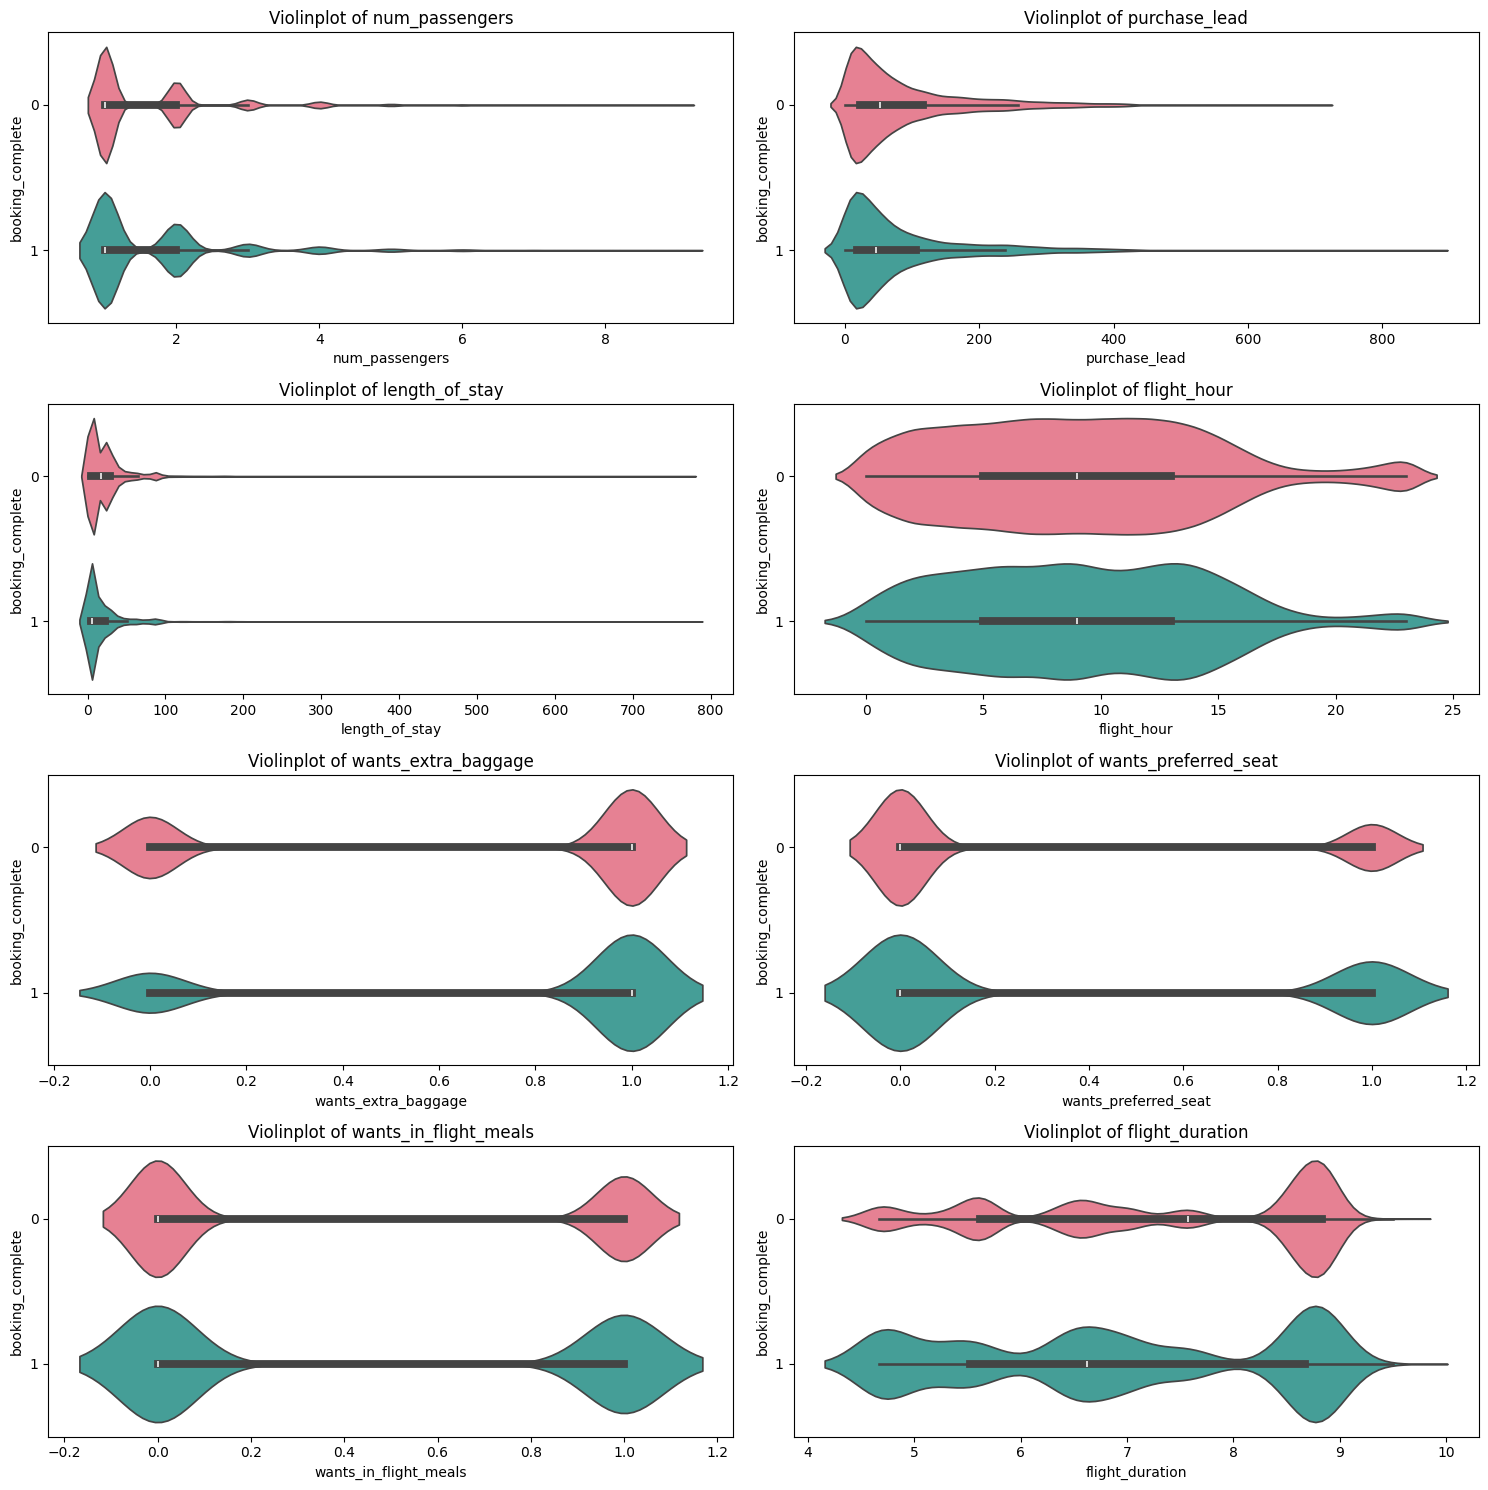

In [26]:
#Violinplot with hue booking_complete

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

nums_bivariate = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
palette = sns.color_palette("husl", df['booking_complete'].nunique())


for i in range(len(nums_bivariate)) :
  sns.violinplot(ax=axes[i], x=df[nums_bivariate[i]], y=df['booking_complete'], orient='h', color='skyblue', palette=palette)
  axes[i].set_title(f'Violinplot of {nums_bivariate[i]}')

plt.tight_layout()

The overall distribution for each feature are quite the same in terms of booking completed or not; only some features have a little more density on some values in booking not completed than completed, but this is related to findings in univariate of booking_complete

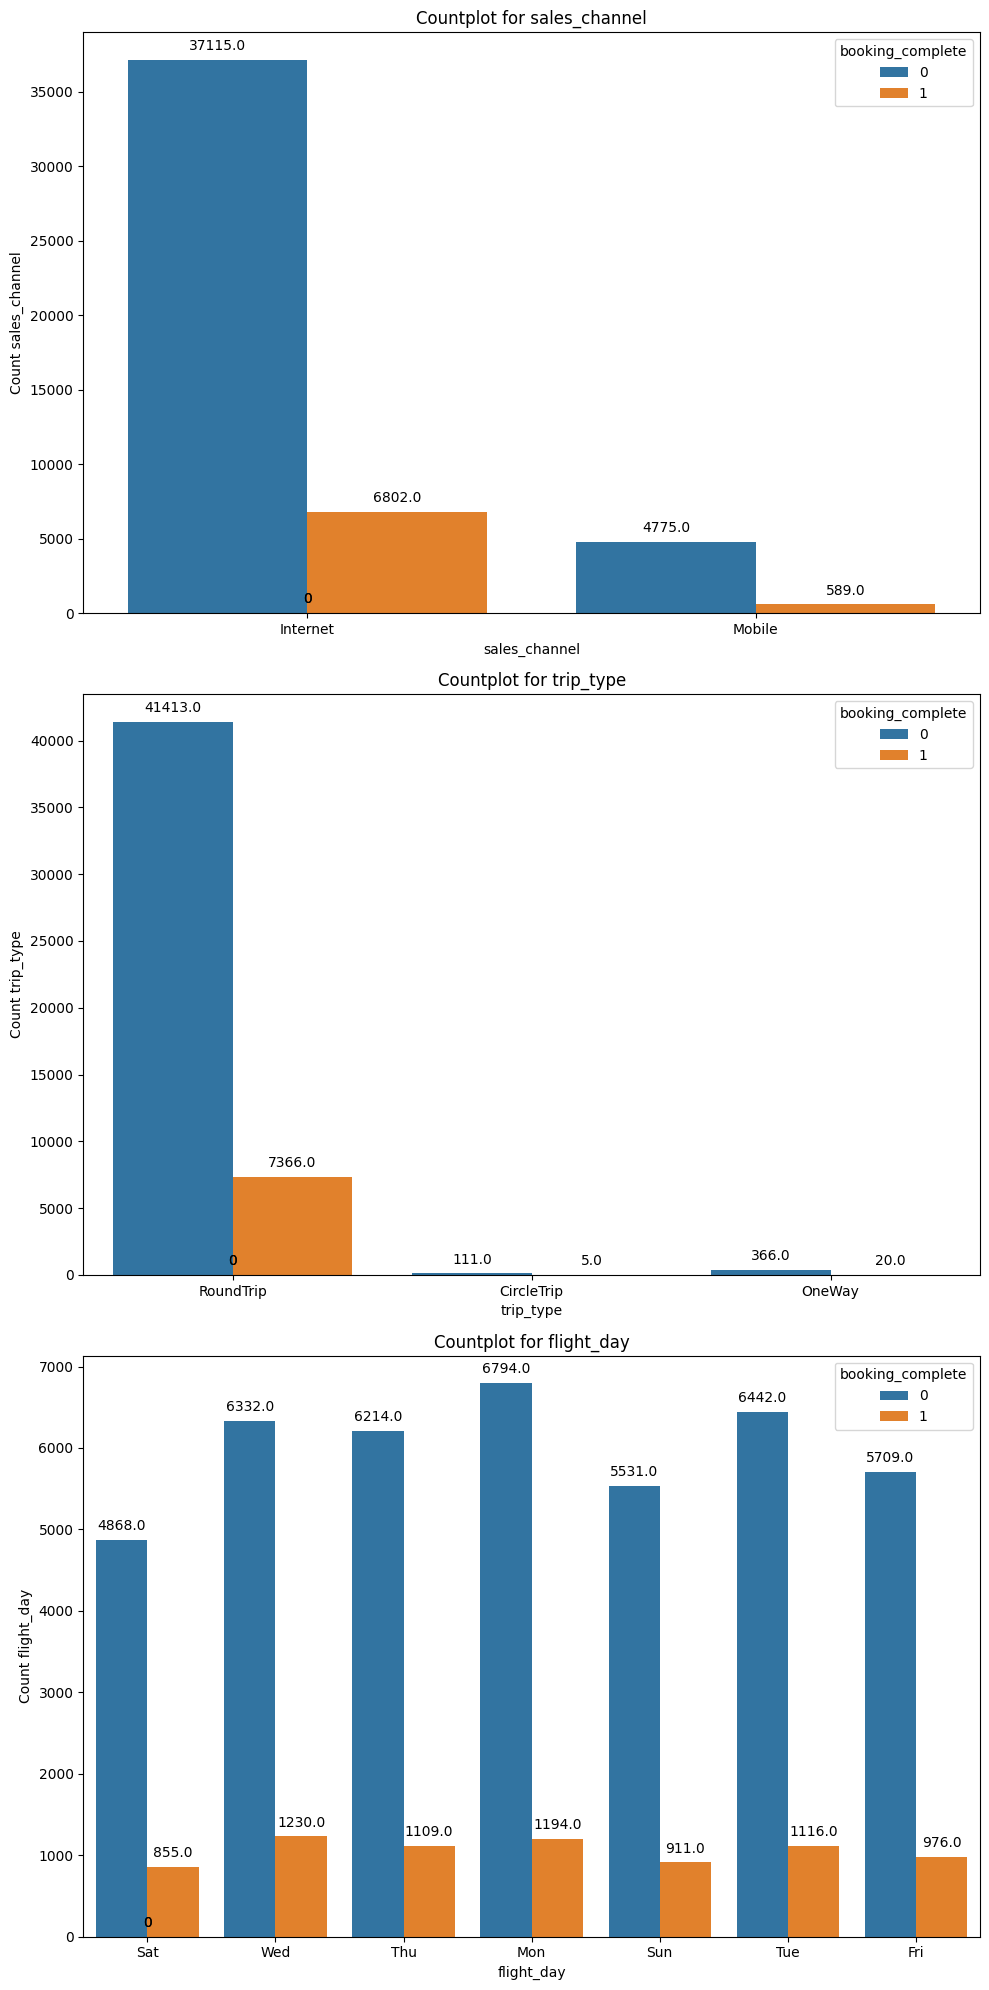

In [27]:
#Categorical Countplot (few unique values) with hue booking_complete
cats_few = ['sales_channel', 'trip_type', 'flight_day']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(ax=axes[i], x=df[cats_few[i]], hue=df['booking_complete'])
    axes[i].set_title(f'Countplot for {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

The imbalance for sales_channel and trip_type are still the same, but there is something interesting here about the flight_day that we can't see in univariate; that is the customers that completes the booking are actually far less than those who dont. This is in line or related to the original booking_complete univariate analysis

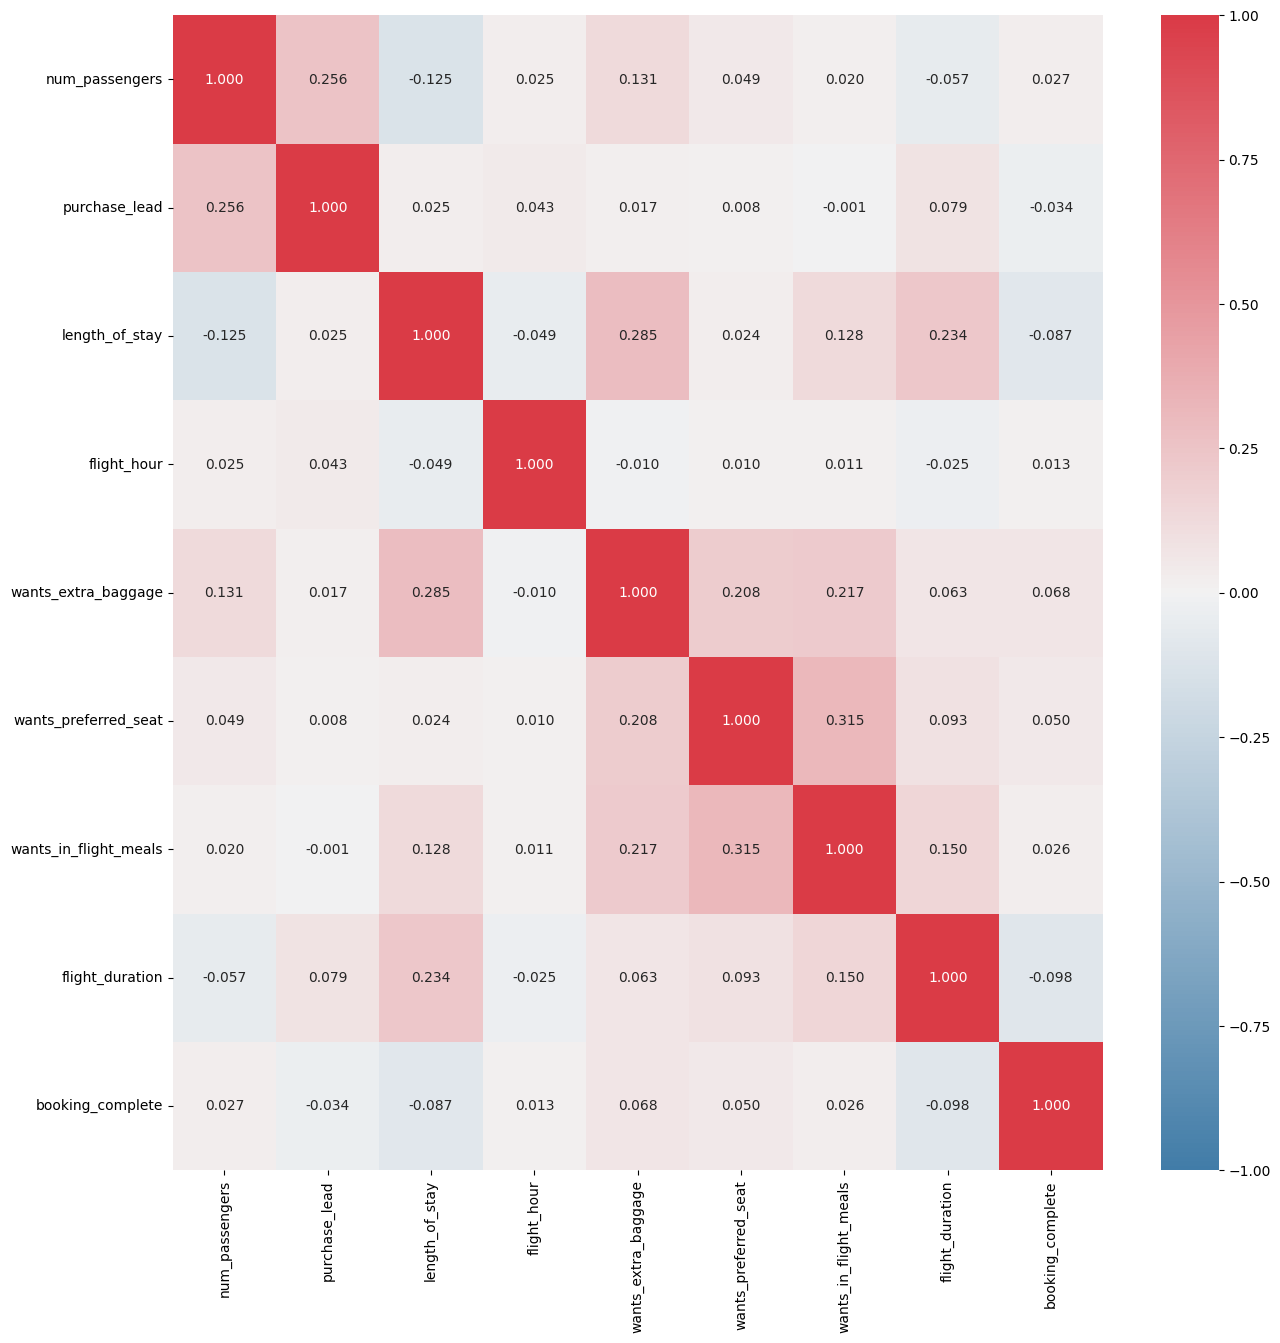

In [28]:
# Heatmap
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In this case we use the spearmann method because it is a non-parametric method used when the relationship between variables is monotonic but not necessarily linear. It can be applied to ordinal, interval, or ratio data; compared to pearson correlation that assumes that the variables are normally distributed and have a linear relationship. In this method we can see that flight_duration and lenght_of_stay are the two feature with the highest correlation

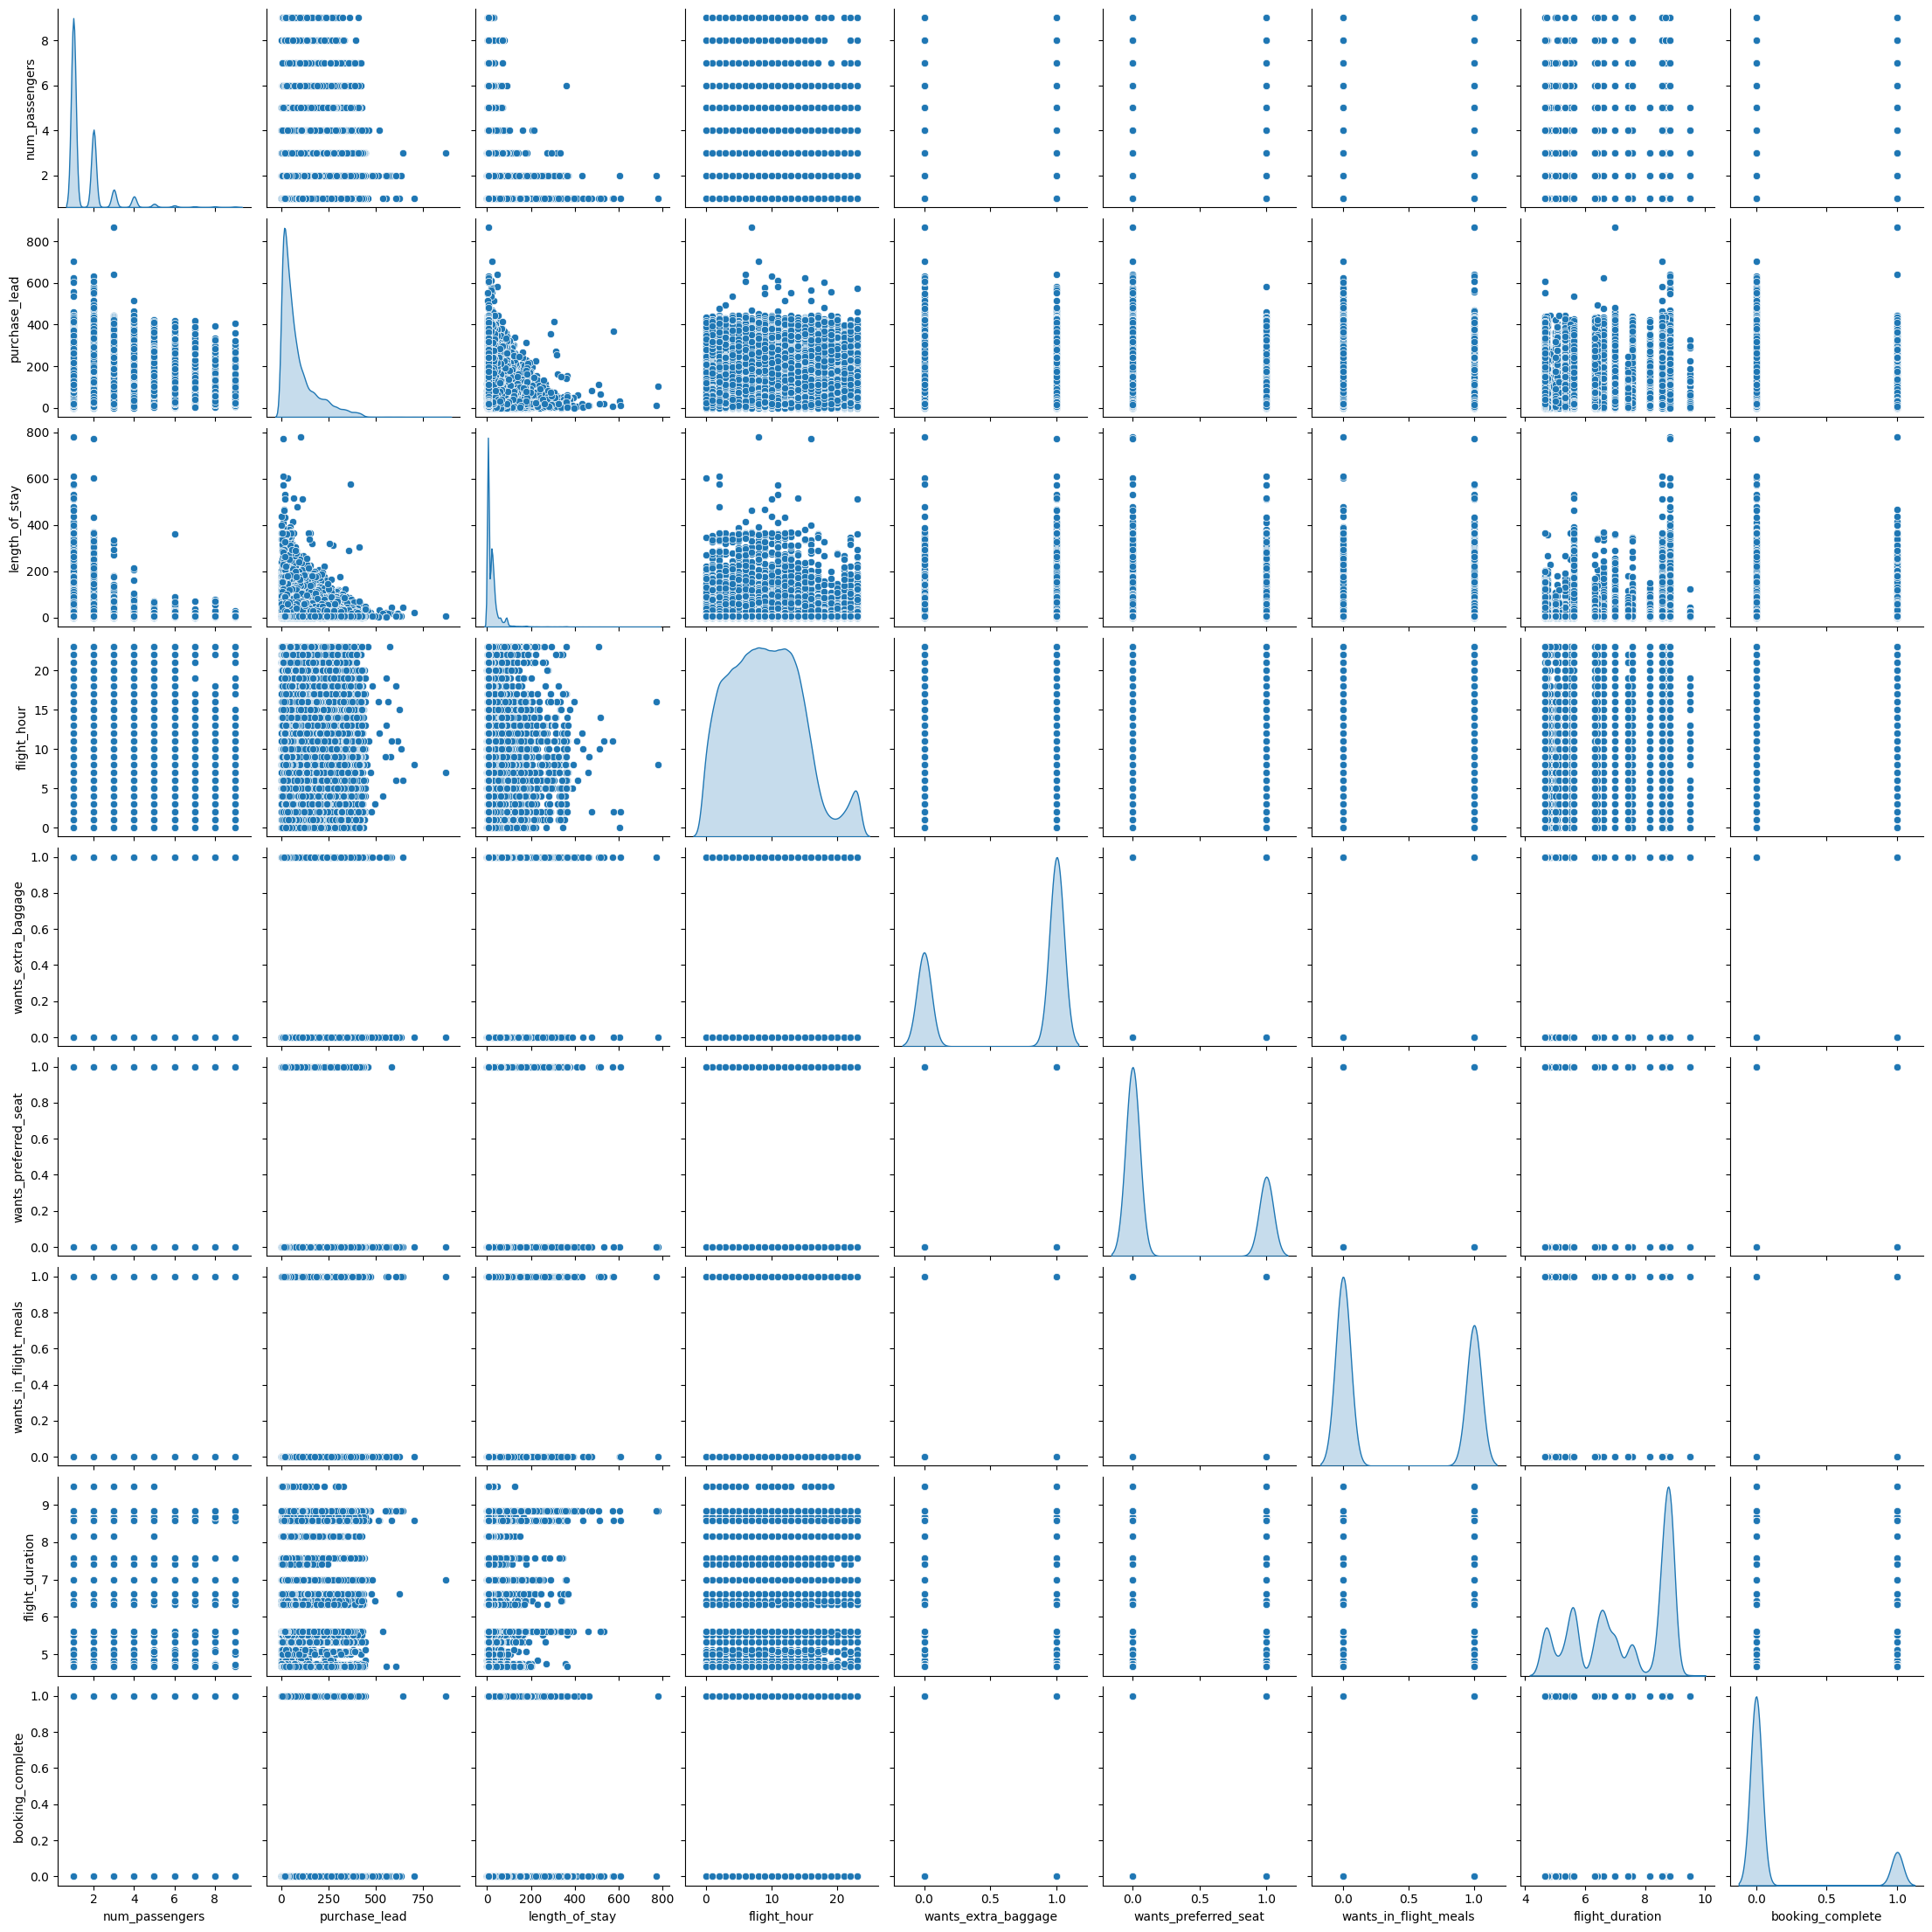

In [29]:
# Pairplot
sns.pairplot(data=df, diag_kind='kde')
plt.show()

The distribution of feature values related to target (booking_complete) are scattered in a non-linear distribution, so we might better use SelectKBest to see the feature importance for more information. This will be done after we do pre-processing

# Feature Engineering

**Additional information to remember about encoding**

The choice between label encoding and one-hot encoding depends on the nature of the data, specifically whether it is nominal or ordinal. Here's a general guideline:

1. **Label Encoding:**
   - **Use Case:** Label encoding is suitable for ordinal data, where there is a clear order or ranking among the categories.
   - **How it works:** It assigns integer values to categories based on their order.
   - **Example:** If you have ordinal data like "low," "medium," and "high," you can assign them values like 1, 2, and 3.

2. **One-Hot Encoding:**
   - **Use Case:** One-hot encoding is suitable for nominal data, where categories have no inherent order or ranking.
   - **How it works:** It creates binary columns for each category, where each column represents the presence or absence of a category.
   - **Example:** For nominal data like colors (e.g., red, blue, green), one-hot encoding would create three binary columns, each representing the presence or absence of a specific color.

   In summary, use label encoding when dealing with ordinal data, where there is a meaningful order among categories. Use one-hot encoding for nominal data when the categories have no inherent order. It's essential to choose the appropriate encoding method to avoid introducing unintended relationships or biases into your models based on the encoding choices.

3. **Frequency Encoding:**

   Frequency encoding is a technique where you encode categorical variables based on the frequency or occurrence of each category in the dataset. Unlike label encoding or one-hot encoding, frequency encoding assigns each category a numerical value proportional to its frequency. This method can be used with both nominal and ordinal data, and its suitability depends on the characteristics of the categorical variable.

   Here are some considerations:

   1. **Nominal Data:**
      - Frequency encoding can be applied to nominal data when you want to represent the importance or prevalence of each category based on its frequency in the dataset.
      - It provides a way to capture information about the distribution of categories in a dataset.

   2. **Ordinal Data:**
      - Frequency encoding can also be used with ordinal data if the ordinal categories have a meaningful relationship with their frequencies.
      - However, in cases where the order of categories is crucial, label encoding might be more appropriate.

   3. **Advantages:**
      - Frequency encoding can be beneficial when dealing with high-cardinality categorical features, as it reduces the dimensionality compared to one-hot encoding.
      - It can capture information about the distribution of categories, which may be useful in certain machine learning scenarios.

   4. **Considerations:**
      - Be cautious when applying frequency encoding if the dataset is imbalanced, as it may overemphasize the importance of infrequent categories.
      - Ensure that the encoding aligns with the underlying nature of the data and the goals of your analysis or modeling task.

   In summary, frequency encoding is a versatile technique that can be applied to both nominal and ordinal data. However, as with any encoding method, it's crucial to consider the characteristics of your data and the goals of your analysis when choosing the most appropriate encoding technique.

4. **Binary Encoding:**

   Binary encoding is another encoding technique commonly used for categorical variables. In binary encoding, each category is represented by its binary code. This method is particularly useful when dealing with nominal data. Here are some key points about binary encoding:

   1. **Nominal Data:**
      - Binary encoding is suitable for nominal data, where there is no inherent order among categories.
      - It encodes each category using binary digits (0s and 1s), creating a binary representation for each category.

   2. **Dimensionality Reduction:**
      - Binary encoding helps reduce dimensionality compared to one-hot encoding, which creates a binary column for each category.
      - The number of binary columns needed is log2(N), where N is the number of unique categories.

   3. **Example:**
      - Suppose you have three categories: A, B, and C. Binary encoding might represent them as 00, 01, and 10, respectively.
      - Each category is represented by a unique binary code, and the length of the binary code depends on the number of unique categories.

   4. **Advantages:**
      - Reduces the dimensionality of the dataset compared to one-hot encoding, making it more memory-efficient.
      - Retains some information about the relationships between categories, especially if there is a hierarchy or pattern in the binary codes.

   5. **Considerations:**
      - Like other encoding techniques, binary encoding assumes no inherent order among categories, so it is not suitable for ordinal data.
      - Care should be taken when dealing with high-cardinality features, as the length of the binary codes increases with the number of unique categories.

   In summary, binary encoding is a suitable choice for nominal data when you want to reduce dimensionality while retaining some information about the relationships between categories. As always, the choice of encoding method depends on the characteristics of your data and the requirements of your machine learning task.

In this case, we can use frequency encoding for sales_channel, trip_type, route, and booking_origin. While one-hot encoding will be applied on flight_day feature. We dont use one-hot encoding on route and booking_origin because the unique values are too many and will cause curse of dimentionality. Though we can also move sales_channel and trip_type to one-hot encoding since they are nominal type not ordinal type

In [30]:
# #Label Encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df['sales_channel'] = le.fit_transform(df['sales_channel'])
# df['sales_channel'] = le.fit_transform(df['sales_channel'])

In [31]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [32]:
#Frequency/Count Encoding
import category_encoders as ce

count_encoder = ce.CountEncoder()

# df['sales_channel']= count_encoder.fit_transform(df['sales_channel'])
# df['trip_type']= count_encoder.fit_transform(df['trip_type'])
df['route']= count_encoder.fit_transform(df['route'])
df['booking_origin']= count_encoder.fit_transform(df['booking_origin'])

In [33]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [34]:
# One-hot Encoding

columns_to_ohe = ['sales_channel', 'trip_type', 'flight_day']

# Loop through the columns and perform one-hot encoding
for column in columns_to_ohe:
    onehots = pd.get_dummies(df[column], prefix=column)
    onehots = onehots.astype(int)
    df = df.join(onehots)

# Drop the original columns after one-hot encoding
df = df.drop(columns=columns_to_ohe)


# Feature Selection

In [35]:
# Re-arrange the columns (booking_complete in last)
df_1 = df.drop(columns='booking_complete')
df_2 = df['booking_complete']
df = pd.concat([df_1, df_2], axis='columns')

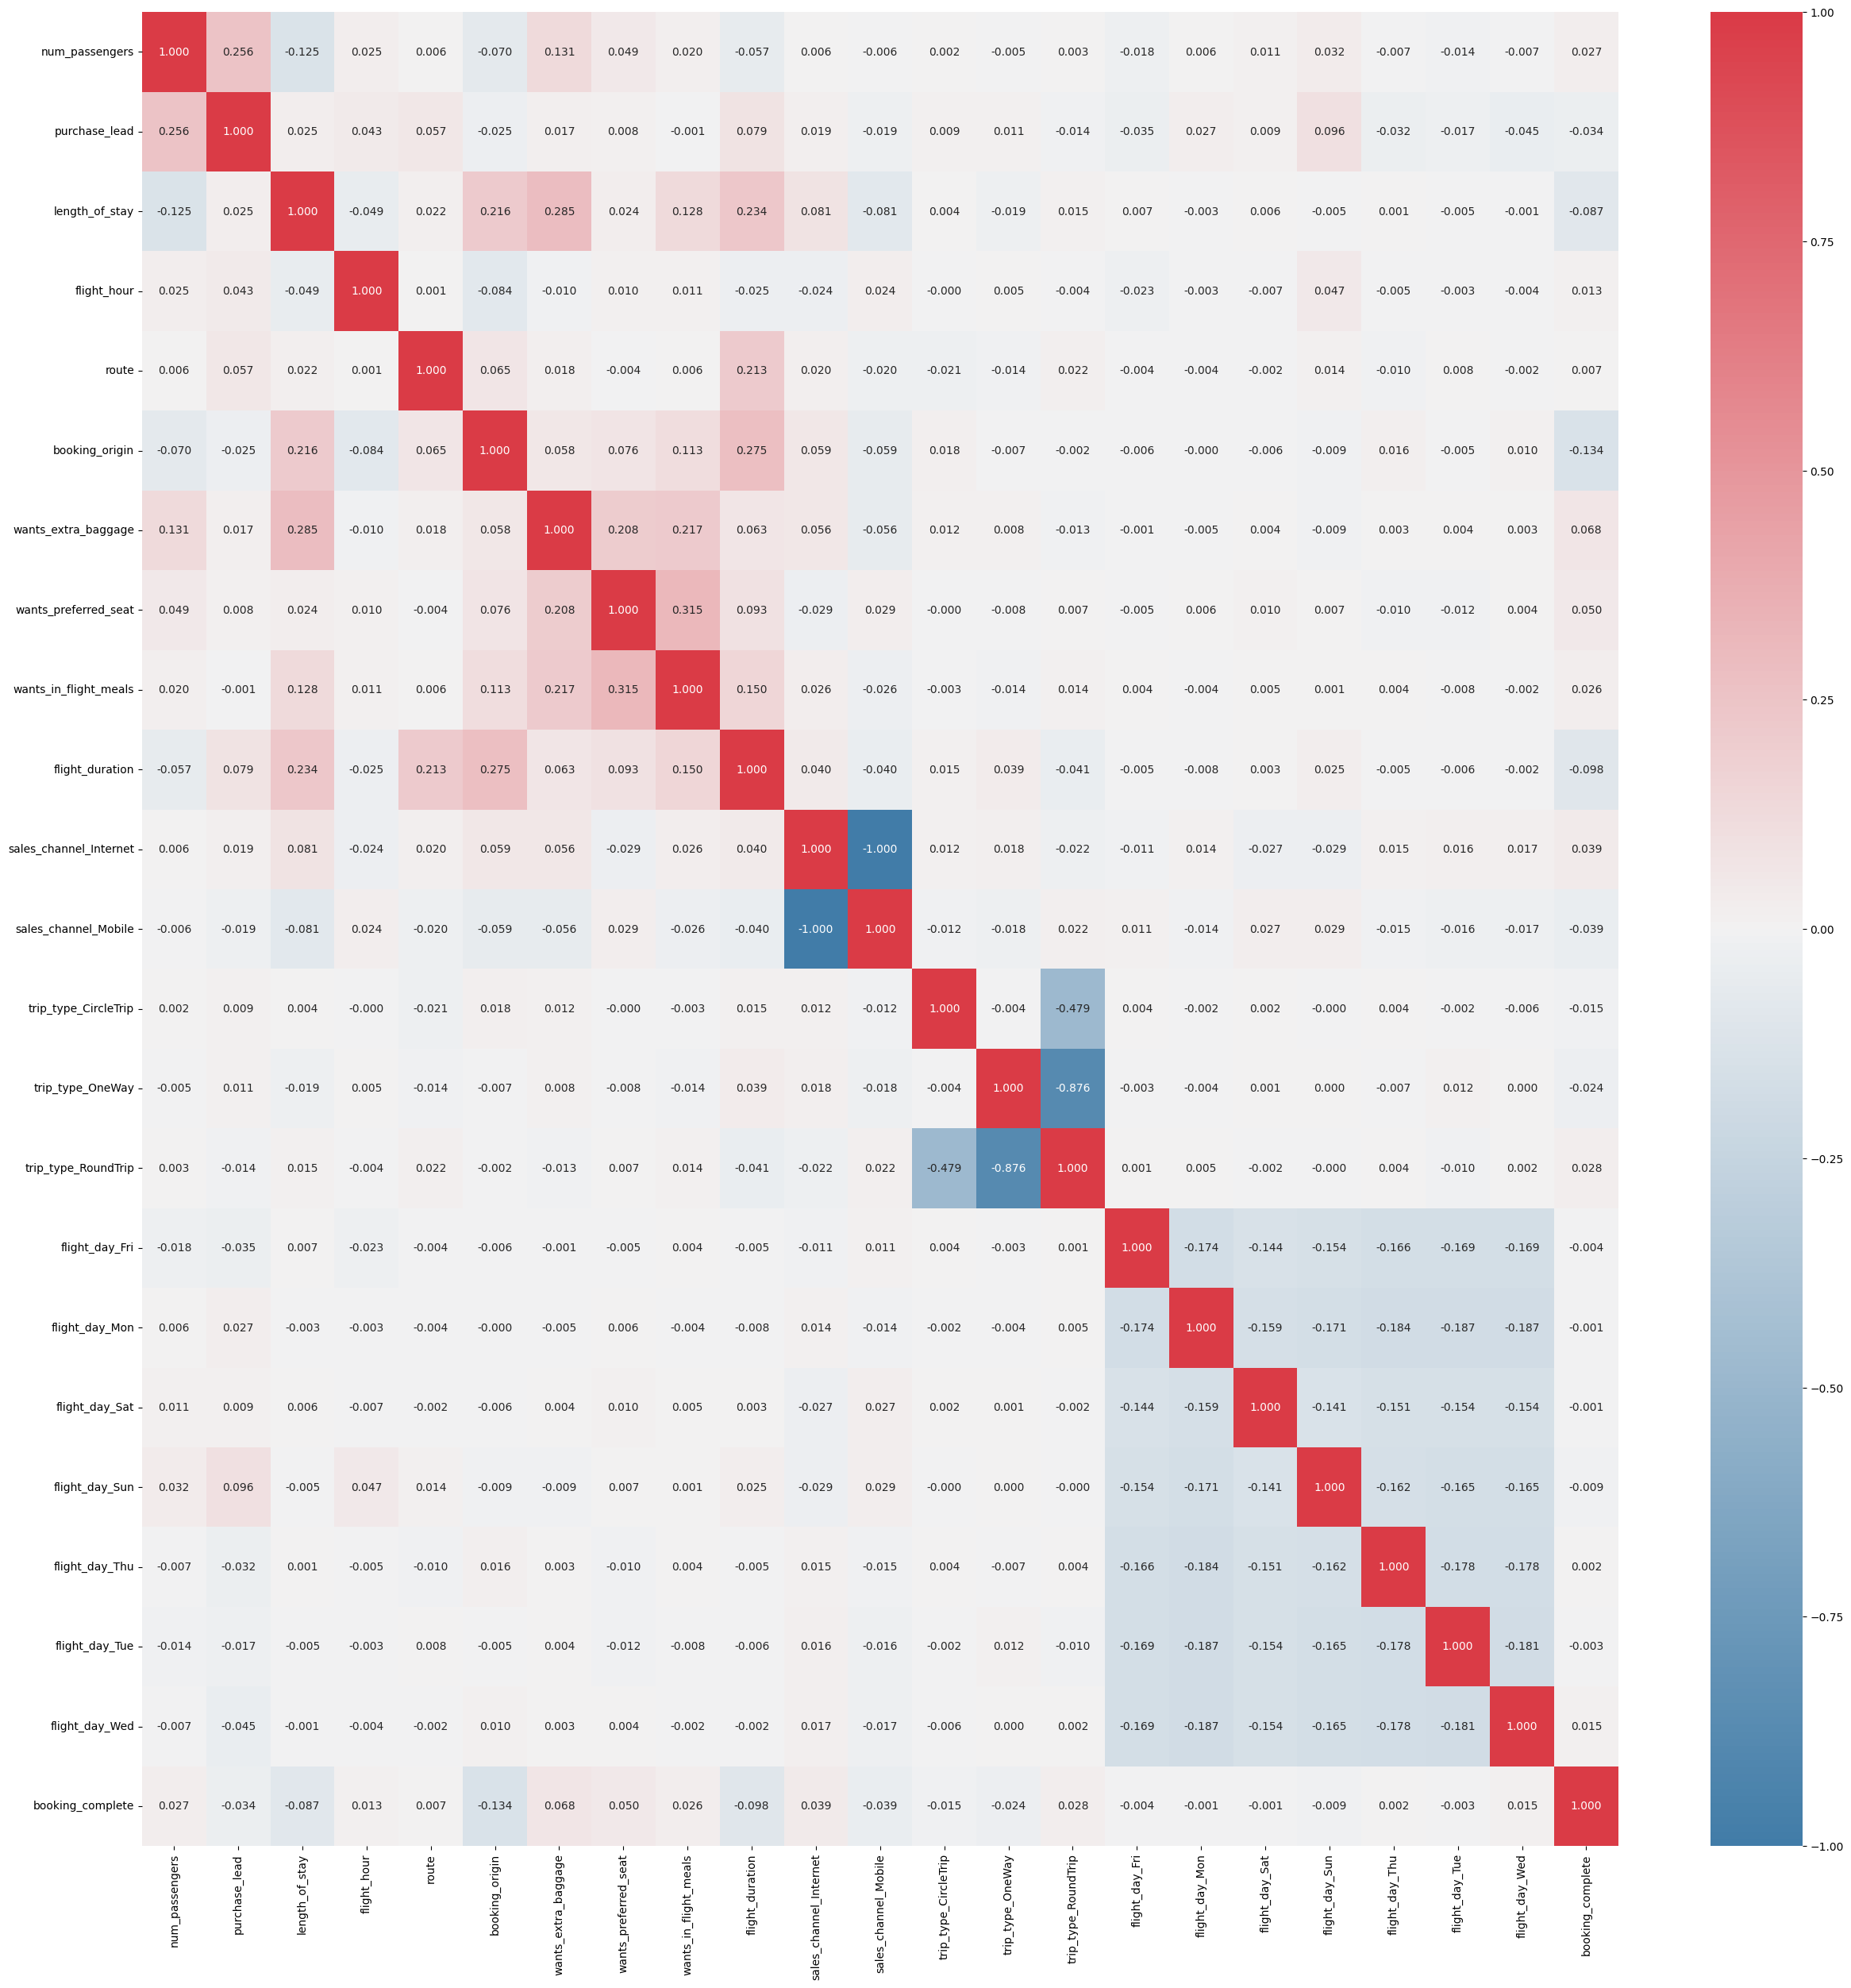

In [36]:
# Heatmap
plt.figure(figsize=(30,30))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [37]:
# Create temporary dataframe for testing SelectKBest

df_feature_target_relation = df.copy()
df_feature_target_relation.head()

num_passengers  purchase_lead  length_of_stay  flight_hour  route  \
0               2            262              19            7     20   
1               1            112              20            3     20   
2               2            243              22           17     20   
3               1             96              31            4     20   
4               2             68              22           15     20   

   booking_origin  wants_extra_baggage  wants_preferred_seat  \
0            1060                    1                     0   
1            1060                    0                     0   
2            1258                    1                     1   
3            1060                    0                     0   
4            1258                    1                     0   

   wants_in_flight_meals  flight_duration  sales_channel_Internet  \
0                      0             5.52                       1   
1                      0             5.52                       1   
2                      0             5.52                       1   
3                      1             5.52                       1   
4                      1             5.52                       1   

   sales_channel_Mobile  trip_type_CircleTrip  trip_type_OneWay  \
0                     0                     0                 0   
1                     0                     0                 0   
2                     0                     0                 0   
3                     0                     0                 0   
4                     0                     0                 0   

   trip_type_RoundTrip  flight_day_Fri  flight_day_Mon  flight_day_Sat  \
0                    1               0               0               1   
1                    1               0               0               1   
2                    1               0               0               0   
3                    1               0               0               1   
4                    1               0               0               0   

   flight_day_Sun  flight_day_Thu  flight_day_Tue  flight_day_Wed  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               1   
3               0               0               0               0   
4               0               0               0               1   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [38]:
#Calculation of feature importance score to target (numerical/categorical feature - categorical target)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['booking_complete'])  # Features
y_target_test = df_feature_target_relation['booking_complete']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
p_values = k_best.pvalues_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P-value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
print(feature_scores_df)

                   Feature     Score P-value
5           booking_origin  0.047303    None
4                    route  0.042985    None
9          flight_duration  0.016981    None
14     trip_type_RoundTrip  0.008982    None
6      wants_extra_baggage  0.008149    None
2           length_of_stay  0.008034    None
10  sales_channel_Internet  0.006676    None
8    wants_in_flight_meals  0.004064    None
15          flight_day_Fri  0.003446    None
1            purchase_lead  0.003424    None
7     wants_preferred_seat  0.003208    None
16          flight_day_Mon  0.002884    None
19          flight_day_Thu  0.002871    None
0           num_passengers  0.002791    None
11    sales_channel_Mobile  0.002765    None
17          flight_day_Sat  0.002034    None
20          flight_day_Tue  0.001984    None
13        trip_type_OneWay  0.001657    None
21          flight_day_Wed  0.001446    None
3              flight_hour  0.000733    None
12    trip_type_CircleTrip  0.000426    None
18        

In [39]:
#Calculation of feature importance score to target (categorical feature - categorical target)

from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['booking_complete'])  # Features
y_target_test = df_feature_target_relation['booking_complete']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=chi2, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
p_values = k_best.pvalues_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P-value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
print(feature_scores_df)

                   Feature         Score       P-value
5           booking_origin  8.384306e+06  0.000000e+00
4                    route  5.789357e+04  0.000000e+00
2           length_of_stay  4.332449e+03  0.000000e+00
1            purchase_lead  2.328843e+03  0.000000e+00
9          flight_duration  1.720139e+02  2.687311e-39
7     wants_preferred_seat  8.743880e+01  8.692823e-21
6      wants_extra_baggage  7.661047e+01  2.082329e-18
11    sales_channel_Mobile  6.789687e+01  1.722741e-16
13        trip_type_OneWay  2.917629e+01  6.608283e-08
8    wants_in_flight_meals  1.969178e+01  9.099171e-06
0           num_passengers  1.858783e+01  1.622532e-05
12    trip_type_CircleTrip  1.039301e+01  1.264935e-03
21          flight_day_Wed  9.535266e+00  2.015610e-03
10  sales_channel_Internet  8.292890e+00  3.980061e-03
3              flight_hour  7.156928e+00  7.467498e-03
18          flight_day_Sun  3.703485e+00  5.429894e-02
15          flight_day_Fri  8.298726e-01  3.623094e-01
14     tri

**Reminder About P-Values**

In statistical hypothesis testing, the p-value is a measure that helps you assess the evidence against a null hypothesis. In the context of evaluating selected features for model training, p-values are often associated with statistical tests, such as t-tests or ANOVA, to determine whether there is a significant difference between groups.

Here's a general guideline:

1. **Null Hypothesis (\(H_0\)):** The null hypothesis typically assumes that there is no significant relationship or difference between groups.
   
2. **Alternative Hypothesis (\(H_1\) or \(H_a\)):** The alternative hypothesis suggests that there is a significant relationship or difference.

3. **P-value Interpretation:**
   - If the p-value is less than or equal to your chosen significance level (often 0.05), you reject the null hypothesis. This suggests that there is enough evidence to conclude that there is a significant relationship or difference.
   - If the p-value is greater than your chosen significance level, you fail to reject the null hypothesis. This implies that there is not enough evidence to conclude a significant relationship or difference.

However, it's crucial to note a few considerations:

- **Multiple Comparisons:** When you're evaluating multiple features simultaneously, there is a risk of inflated Type I error (false positives) due to multiple comparisons. In such cases, you might want to apply a correction method (like Bonferroni correction) to adjust the significance level.

- **Effect Size:** Even if a result is statistically significant, it might not be practically significant. Therefore, it's important to consider the effect size along with p-values.

- **Domain Knowledge:** Statistical significance does not guarantee practical importance. Consider the context and domain-specific knowledge when interpreting results.

- **Model Performance:** P-values alone might not be sufficient for feature selection. It's crucial to also consider how well the selected features contribute to the overall performance of your predictive model.

In summary, while a commonly used threshold is a p-value less than 0.05, the interpretation should be made in the context of your study, and it's essential to consider additional factors like effect size, domain knowledge, and overall model performance.

In [40]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun',
       'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed',
       'booking_complete'],
      dtype='object')

In [41]:
# Select only relevant features for each cases before moving to modelling process

df_model = df.copy()

selected_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun',
       'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed',
       'booking_complete']

df_model = df_model[selected_features]

# Modelling

## Train-Test Split

In [42]:
#Re-arrange the columns (booking_complete in last)
df_1 = df_model.drop(columns='booking_complete')
df_2 = df_model['booking_complete']
df_model = pd.concat([df_1, df_2], axis='columns')

In [43]:
#Checking dataframe after modelling process
df_model.head()

num_passengers  purchase_lead  length_of_stay  flight_hour  route  \
0               2            262              19            7     20   
1               1            112              20            3     20   
2               2            243              22           17     20   
3               1             96              31            4     20   
4               2             68              22           15     20   

   booking_origin  wants_extra_baggage  wants_preferred_seat  \
0            1060                    1                     0   
1            1060                    0                     0   
2            1258                    1                     1   
3            1060                    0                     0   
4            1258                    1                     0   

   wants_in_flight_meals  flight_duration  sales_channel_Internet  \
0                      0             5.52                       1   
1                      0             5.52                       1   
2                      0             5.52                       1   
3                      1             5.52                       1   
4                      1             5.52                       1   

   sales_channel_Mobile  trip_type_CircleTrip  trip_type_OneWay  \
0                     0                     0                 0   
1                     0                     0                 0   
2                     0                     0                 0   
3                     0                     0                 0   
4                     0                     0                 0   

   trip_type_RoundTrip  flight_day_Fri  flight_day_Mon  flight_day_Sat  \
0                    1               0               0               1   
1                    1               0               0               1   
2                    1               0               0               0   
3                    1               0               0               1   
4                    1               0               0               0   

   flight_day_Sun  flight_day_Thu  flight_day_Tue  flight_day_Wed  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               1   
3               0               0               0               0   
4               0               0               0               1   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [44]:
#Train test split
x = df_model.drop(columns=['booking_complete'])
y = df_model[['booking_complete']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

**Additional Information about Split Train-Test with Target Class Imbalance**

The class distribution in the training set and the test set may not necessarily reflect the original class imbalance if you use a simple train-test split, especially if the dataset is imbalanced.

When you split the data into training and testing sets, the split is often random, and there's a chance that the class distribution in the training set and test set might differ from the original dataset. If the class distribution is imbalanced, you might end up with imbalanced subsets in both the training and testing sets.

To address this concern, you can use techniques like stratified sampling during the train-test split. Stratified sampling ensures that the class distribution is preserved in both the training and testing sets, maintaining the original imbalance. This is particularly important when dealing with imbalanced datasets because it helps ensure that the model learns and generalizes well on both classes.

Here's an example using scikit-learn in Python:

```python
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
```

In this example, the `stratify=y` argument ensures that the class distribution in the target variable `y` is preserved when splitting the data into training and testing sets. Adjust the `test_size` parameter based on your preference for the split ratio.

In [45]:
# Checking imbalance before train-test split
value_counts = y.value_counts()
percentage_values = (value_counts / len(y)) * 100

print(percentage_values)

booking_complete
0                   85.002334
1                   14.997666
dtype: float64


In [46]:
# Checking imbalance after train-test split
value_counts = y_train.value_counts()
percentage_values = (value_counts / len(y_train)) * 100

print(percentage_values)

booking_complete
0                   85.00116
1                   14.99884
dtype: float64


## Handling Outliers

In [47]:
#Make temporary dataframe of features and target for train set
df_train_handling_outliers = pd.concat([x_train, y_train], axis='columns')

In [48]:
# Preprocessing remove outlier (IQR Method)
selected_features = ['num_passengers', 'purchase_lead', 'length_of_stay']

print(f'The number of rows before filtering out outliers : {len(df_train_handling_outliers)}')

filtered_entries = np.array([True] * len(df_train_handling_outliers))

# Select features with outliers
for col in selected_features:

    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1

    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train_handling_outliers[col] >= low_limit) & (df_train_handling_outliers[col] <= high_limit)) & filtered_entries

df_train_handling_outliers = df_train_handling_outliers[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

The number of rows before filtering out outliers : 34496
The number of rows after filtering out outliers: 27926


In [49]:
# # Remove outliers with z-score method

# from scipy import stats

# selected_features = ['num_passengers', 'purchase_lead', 'length_of_stay']

# print(f'The number of rows before filtering out outliers : {len(df_train_handling_outliers)}')

# filtered_entries = np.array([True] * len(df_train_handling_outliers))

# # Select features with outliers
# for col in selected_features:
#     zscore = abs(stats.zscore(df_train_handling_outliers[col])) # calculate the absolute z-score
#     filtered_entries = (zscore < 3) & filtered_entries # keep z-score values less than absolute 3

# df_train_handling_outliers = df_train_handling_outliers[filtered_entries]

# print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

In [50]:
#Split the features and target for train set again
x_train = df_train_handling_outliers.drop(columns='booking_complete')
y_train = df_train_handling_outliers['booking_complete']

## Feature Scaling

**Additional Reminder About Feature Scalling**

When the original distribution is right-skewed, meaning that the majority of the data is concentrated on the left side with a long tail to the right, it's often more appropriate to use transformations that are less sensitive to extreme values. In this case, Min-Max scaling may be a better choice than Z-score normalization.

Here's a brief explanation:

1. **Min-Max Scaling:**
   - Scales the data to a specific range (e.g., between 0 and 1).
   - Less affected by outliers compared to Z-score normalization.
   - Suitable when the distribution is not normal and skewed.

2. **Z-score Normalization (Standardization):**
   - Centers the data around the mean and scales it by the standard deviation.
   - Can be sensitive to outliers, and right-skewed distributions may have extreme values that influence the scaling.
   - More appropriate when the data is approximately normally distributed.

Given a right-skewed distribution, Min-Max scaling is often a better choice as it allows the preservation of the skewed shape of the distribution and avoids amplifying the impact of outliers. However, the choice may also depend on the specific characteristics of your data and the requirements of your modeling task. If your data has extreme outliers, you might also consider other robust scaling methods.

In [51]:
#See overall descriptive statistics
x_train.describe().transpose()

count         mean          std   min      25%  \
num_passengers          27926.0     1.389780     0.601468  1.00     1.00   
purchase_lead           27926.0    66.325682    62.080015  0.00    19.00   
length_of_stay          27926.0    16.295173    14.355454  0.00     5.00   
flight_hour             27926.0     9.031798     5.388425  0.00     5.00   
route                   27926.0   381.088090   542.854426  1.00    80.00   
booking_origin          27926.0  8802.691757  7052.101733  1.00  2317.00   
wants_extra_baggage     27926.0     0.644668     0.478622  0.00     0.00   
wants_preferred_seat    27926.0     0.291628     0.454520  0.00     0.00   
wants_in_flight_meals   27926.0     0.418463     0.493316  0.00     0.00   
flight_duration         27926.0     7.251596     1.503009  4.67     5.62   
sales_channel_Internet  27926.0     0.884803     0.319266  0.00     1.00   
sales_channel_Mobile    27926.0     0.115197     0.319266  0.00     0.00   
trip_type_CircleTrip    27926.0     0.002220     0.047067  0.00     0.00   
trip_type_OneWay        27926.0     0.008272     0.090574  0.00     0.00   
trip_type_RoundTrip     27926.0     0.989508     0.101894  0.00     1.00   
flight_day_Fri          27926.0     0.138366     0.345290  0.00     0.00   
flight_day_Mon          27926.0     0.158526     0.365240  0.00     0.00   
flight_day_Sat          27926.0     0.116916     0.321326  0.00     0.00   
flight_day_Sun          27926.0     0.121571     0.326796  0.00     0.00   
flight_day_Thu          27926.0     0.153978     0.360934  0.00     0.00   
flight_day_Tue          27926.0     0.154623     0.361551  0.00     0.00   
flight_day_Wed          27926.0     0.156019     0.362880  0.00     0.00   

                            50%       75%      max  
num_passengers             1.00      2.00      3.0  
purchase_lead             46.00     94.00    256.0  
length_of_stay             6.00     25.00     62.0  
flight_hour                9.00     13.00     23.0  
route                    225.00    439.00   2620.0  
booking_origin          7055.00  17691.00  17691.0  
wants_extra_baggage        1.00      1.00      1.0  
wants_preferred_seat       0.00      1.00      1.0  
wants_in_flight_meals      0.00      1.00      1.0  
flight_duration            7.57      8.83      9.5  
sales_channel_Internet     1.00      1.00      1.0  
sales_channel_Mobile       0.00      0.00      1.0  
trip_type_CircleTrip       0.00      0.00      1.0  
trip_type_OneWay           0.00      0.00      1.0  
trip_type_RoundTrip        1.00      1.00      1.0  
flight_day_Fri             0.00      0.00      1.0  
flight_day_Mon             0.00      0.00      1.0  
flight_day_Sat             0.00      0.00      1.0  
flight_day_Sun             0.00      0.00      1.0  
flight_day_Thu             0.00      0.00      1.0  
flight_day_Tue             0.00      0.00      1.0  
flight_day_Wed             0.00      0.00      1.0

In [52]:
#See how many subplot shoud be made
len(df.columns)

23

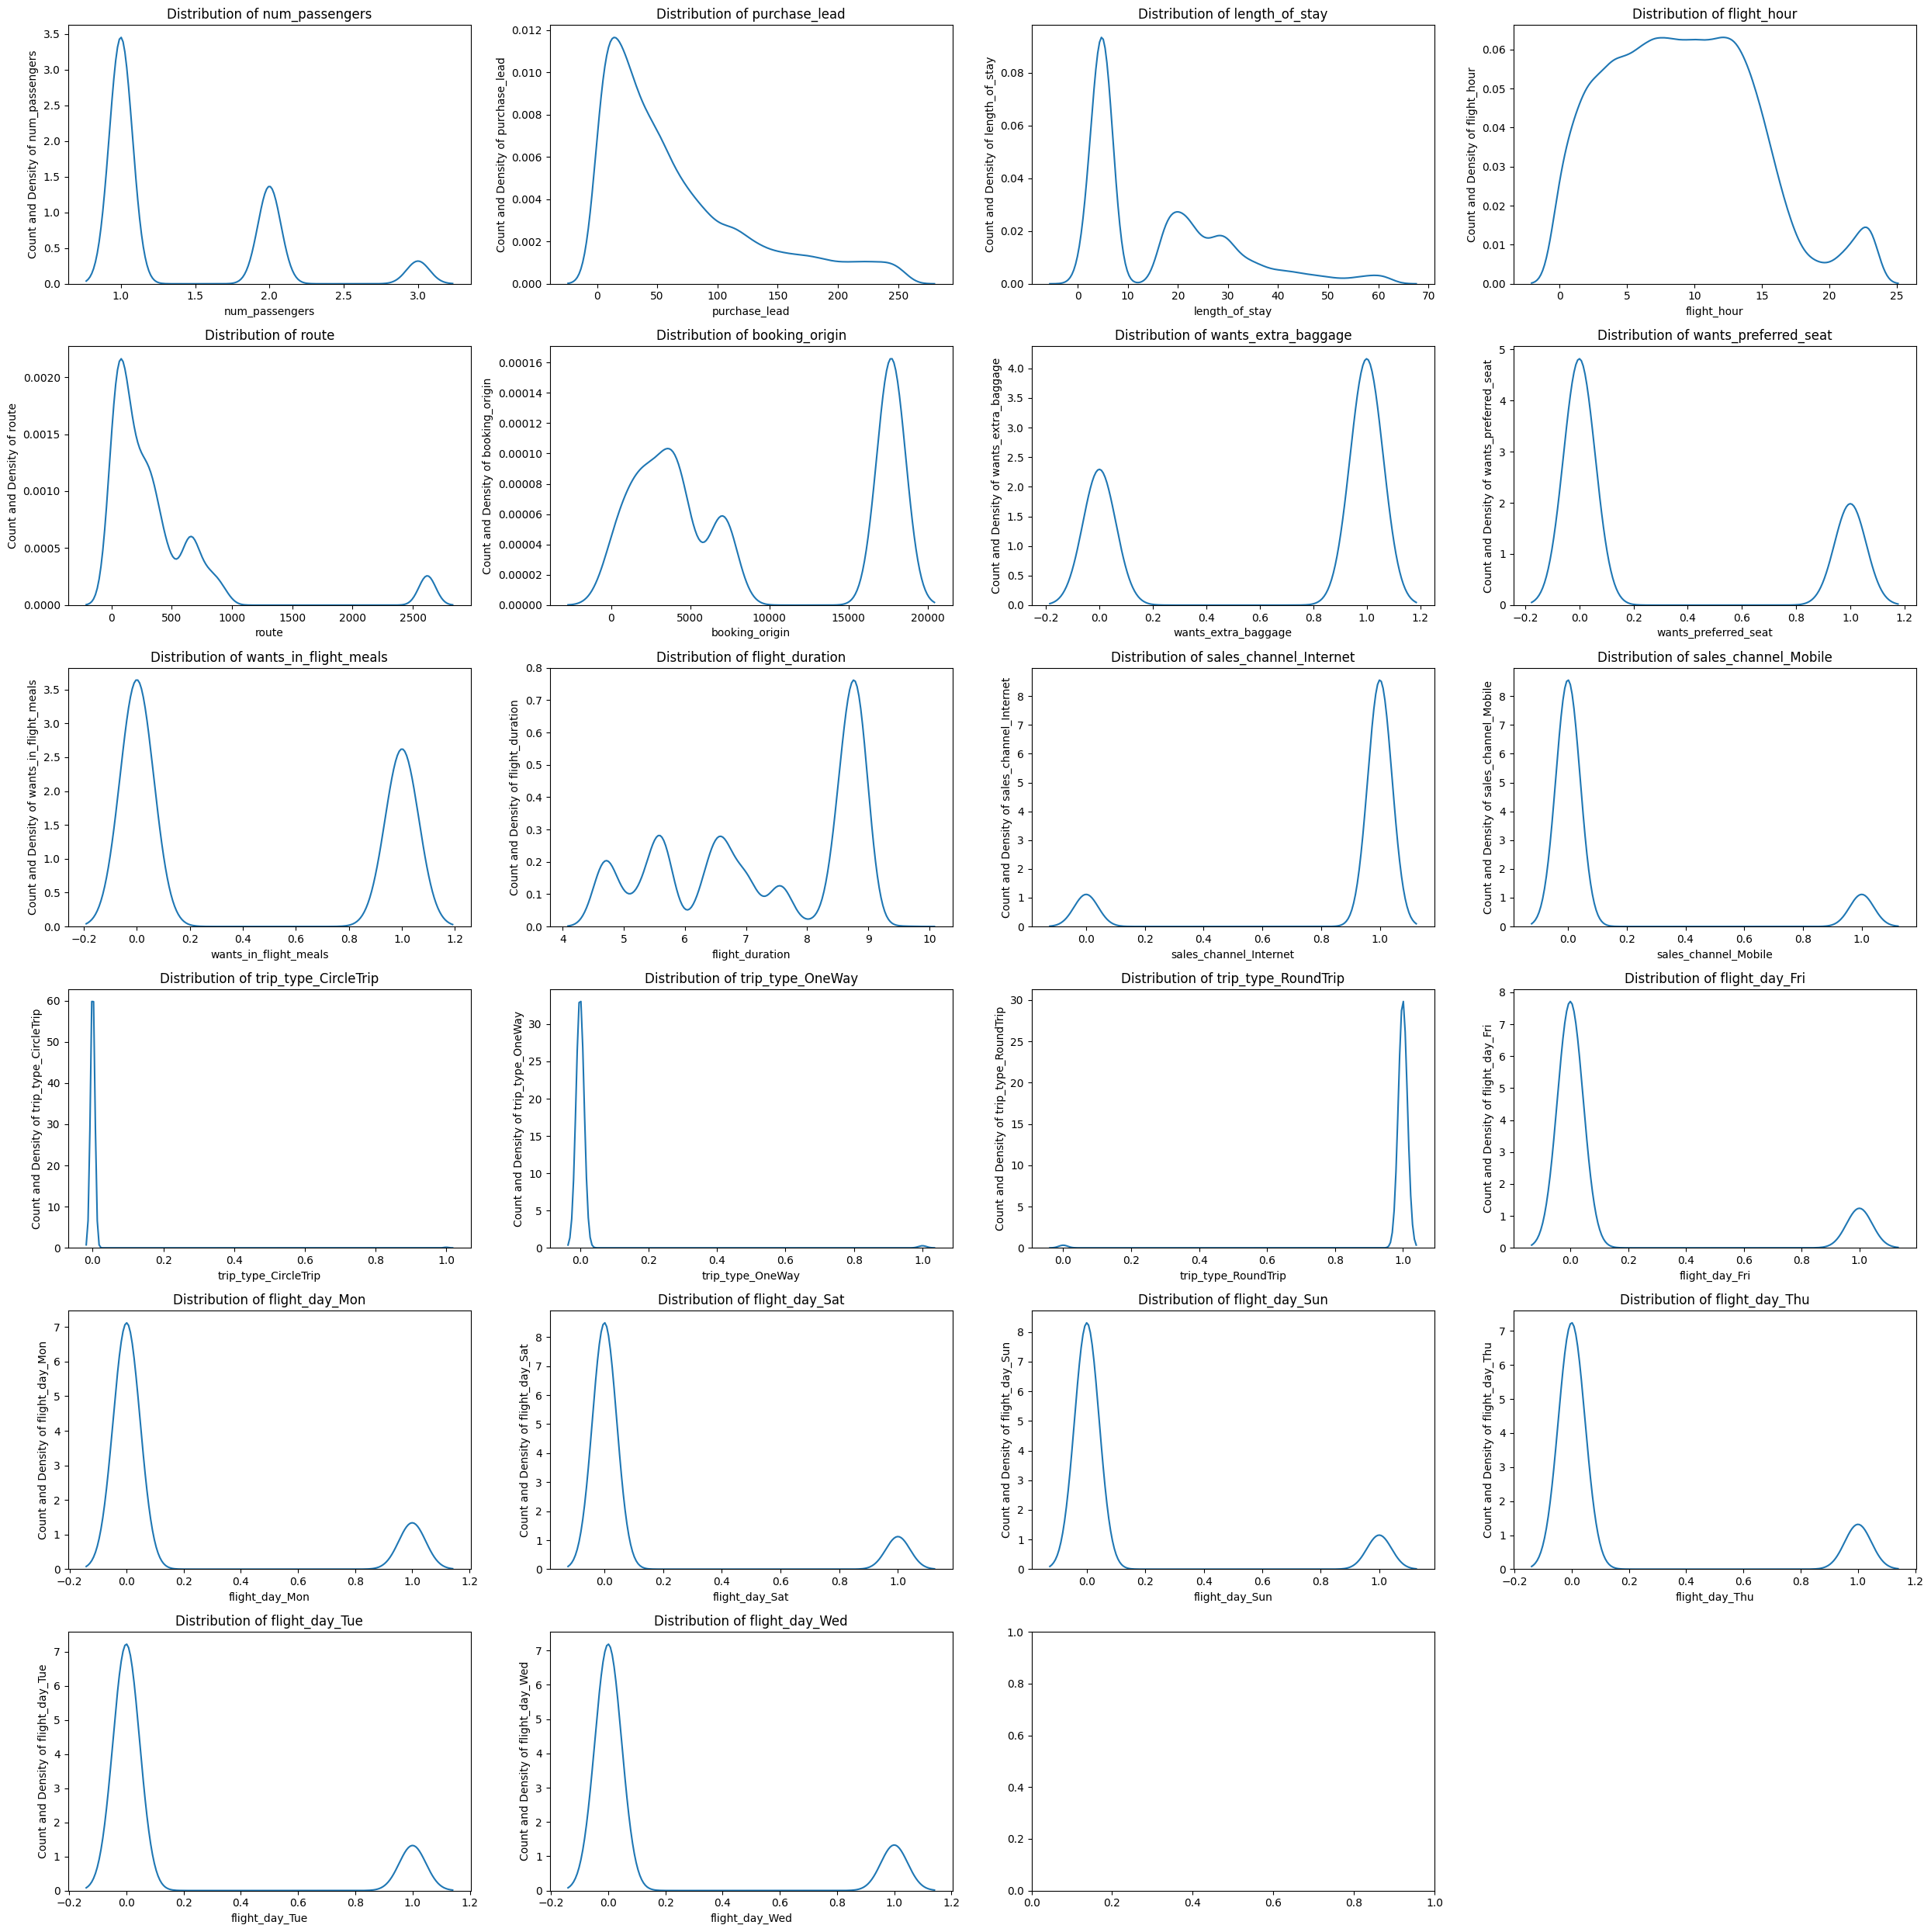

In [53]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(25, 25))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
  sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
  axes[i].set_title(f'Distribution of {x_train.columns[i]}')
  axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
  axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

In [54]:
#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

# columns_to_scale = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
columns_to_scale = x_train.columns.to_list() #choose all columns

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ms.fit_transform(x_train[[n]])
  x_test[n] = ms.fit_transform(x_test[[n]])

# Save the scaler using joblib
joblib.dump(ms, 'minmax_scaler.joblib')

['minmax_scaler.joblib']

In [55]:
#Standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

columns_to_scale = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
# columns_to_scale = x_train.columns.to_list() #choose all columns

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ss.fit_transform(x_train[[n]])
  x_test[n] = ss.fit_transform(x_test[[n]])

# Save the scaler using joblib
joblib.dump(ss, 'standard_scaler.joblib')

['standard_scaler.joblib']

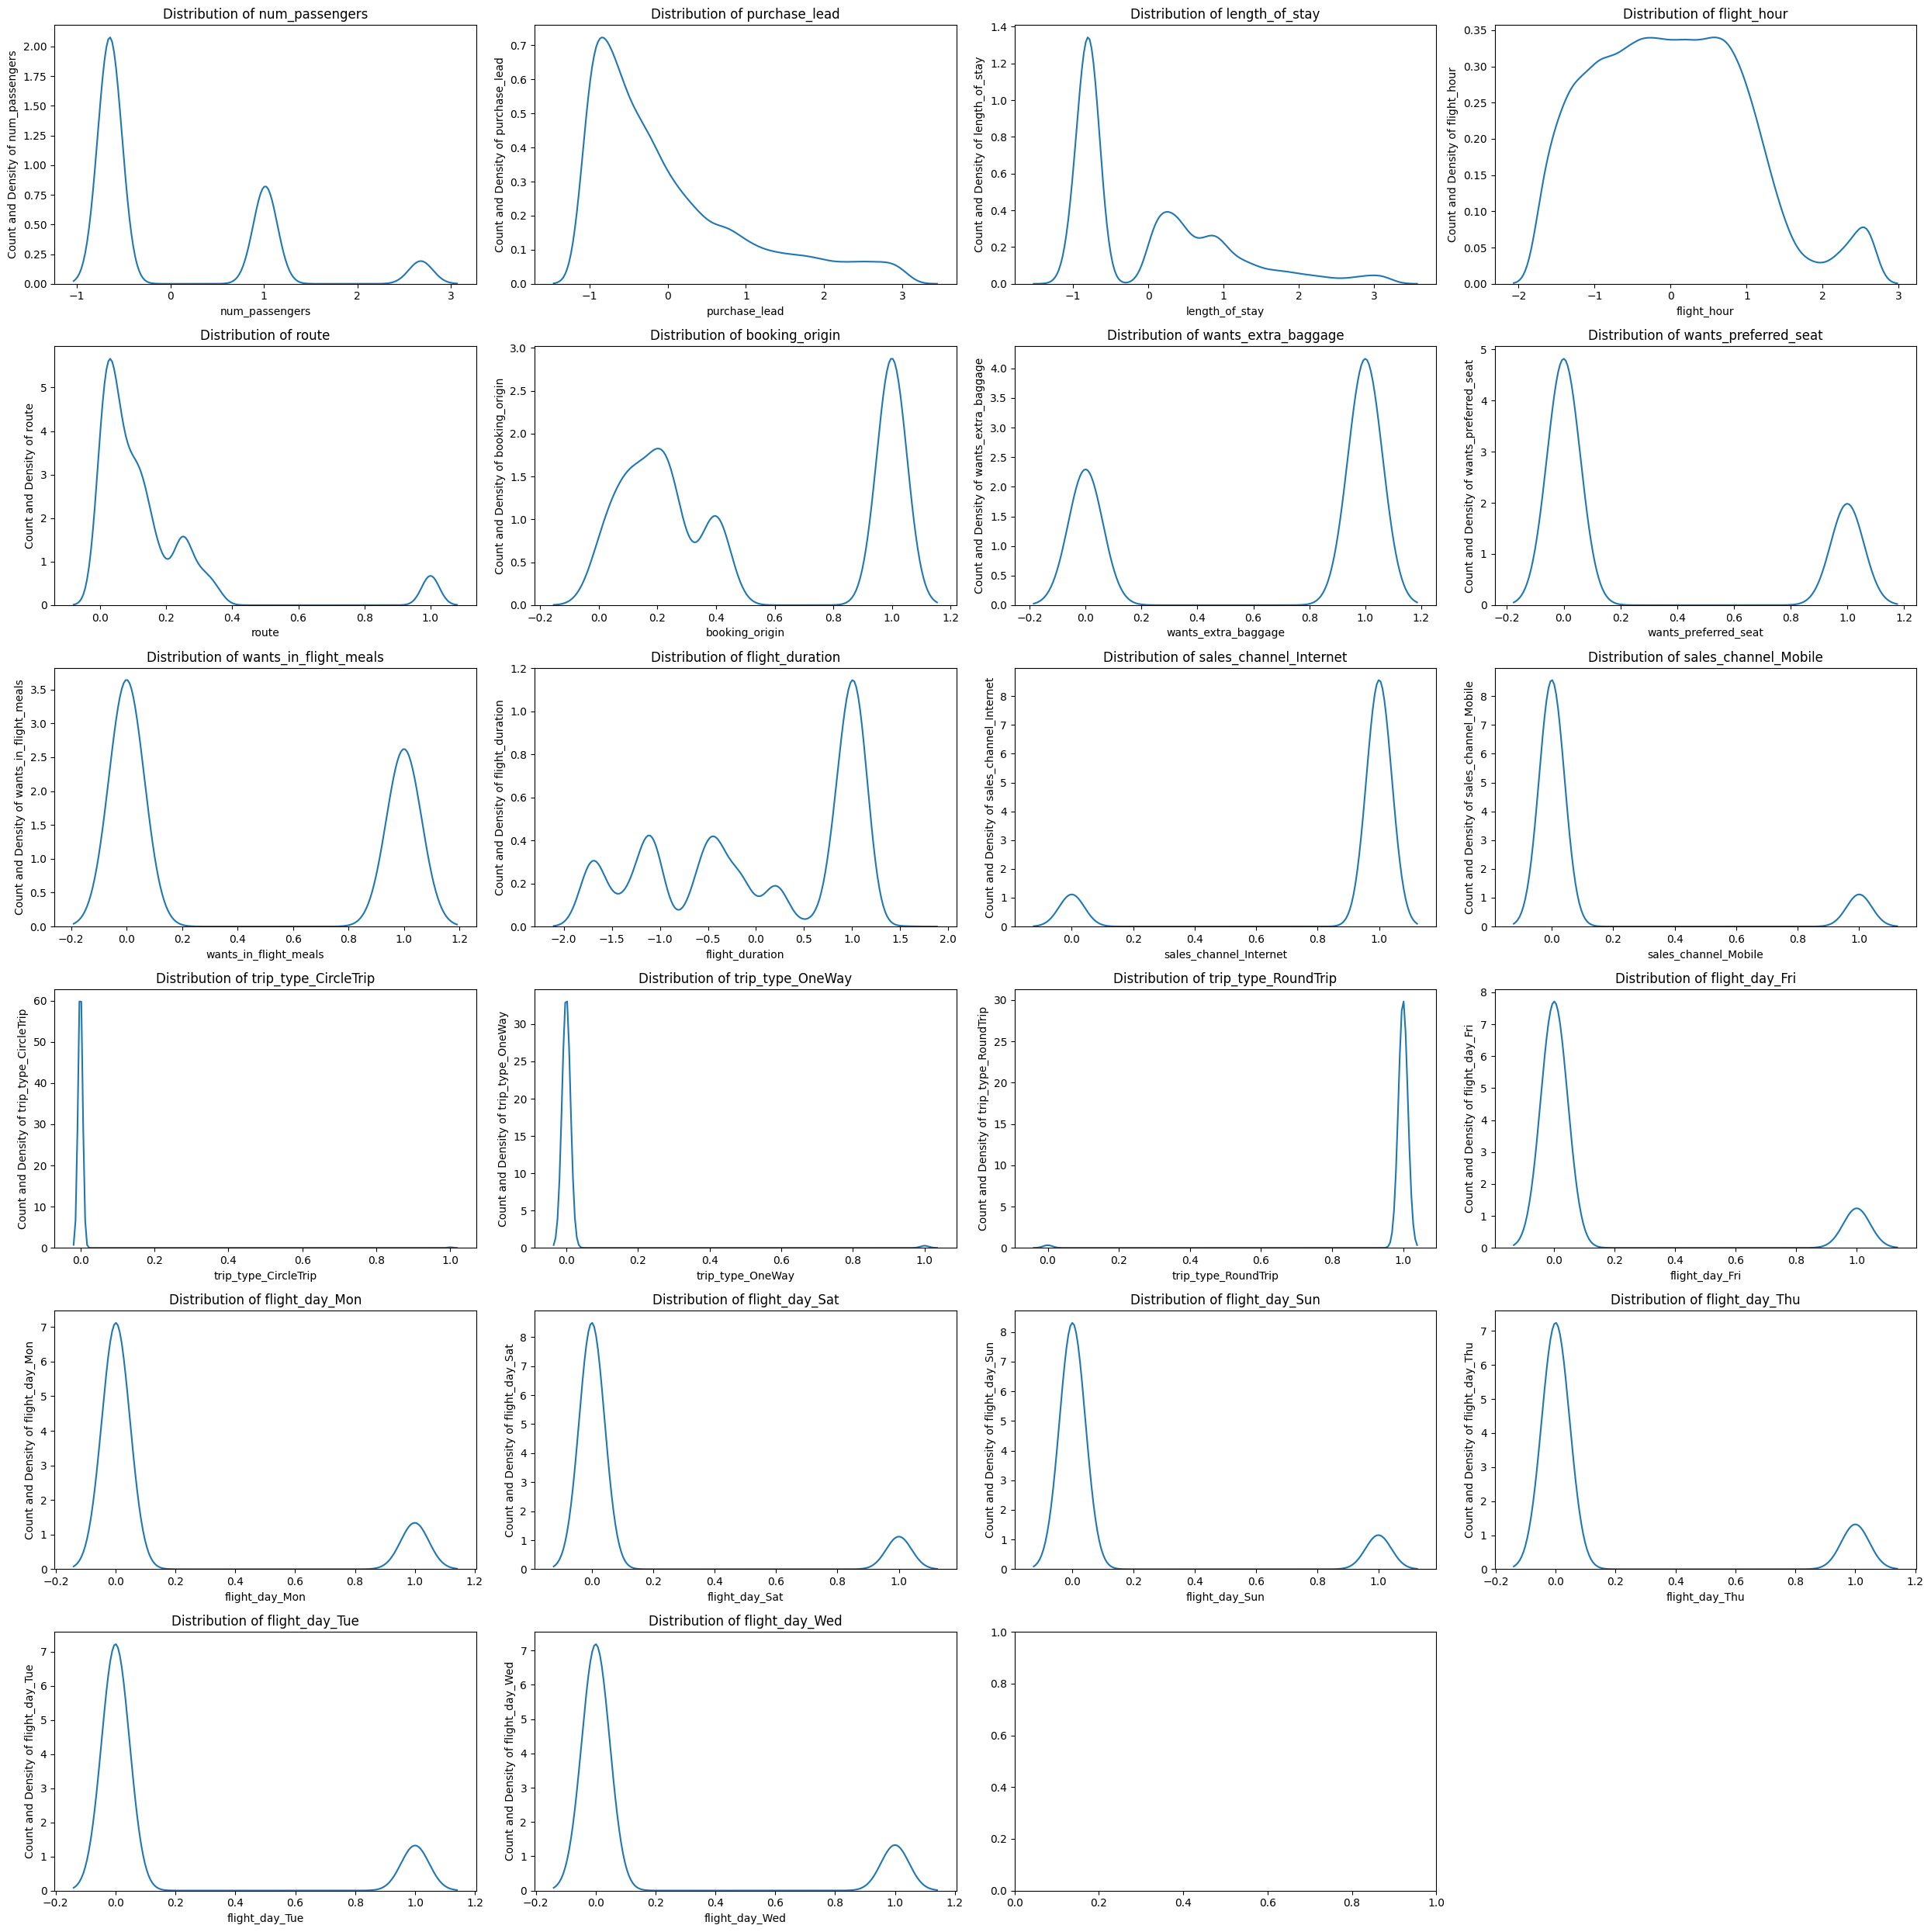

In [56]:
# Checking distribution after scaling
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(25, 25))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
  sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
  axes[i].set_title(f'Distribution of {x_train.columns[i]}')
  axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
  axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

# Handling Class Imbalance

In [57]:
#Initiate dataframe before sampling
x_imbalance = x_train.copy()
y_imbalance = y_train.copy()

In [58]:
#Target values before sampling
y_imbalance.value_counts()

0    23754
1     4172
Name: booking_complete, dtype: int64

In [59]:
# #Target values before sampling
# value_counts = y_imbalance.iloc[:, 0].value_counts()
# print(value_counts)

In [60]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print("Before sampling:")
print("x_imbalance shape:", x_imbalance.shape)
print("y_imbalance shape:", y_imbalance.shape)

# RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
x_train_under, y_train_under = rus.fit_resample(x_imbalance, y_imbalance)

print("After RandomUnderSampler:")
print("x_train_under shape:", x_train_under.shape)
print("y_train_under shape:", y_train_under.shape)

# # RandomOverSampler
# ros = RandomOverSampler(sampling_strategy=1)
# x_train_over, y_train_over = ros.fit_resample(x_imbalance, y_imbalance)

# print("After RandomOverSampler:")
# print("x_train_over shape:", x_train_over.shape)
# print("y_train_over shape:", y_train_over.shape)

# # SMOTE
# smote = SMOTE(sampling_strategy=1)
# x_over_SMOTE, y_over_SMOTE = smote.fit_resample(x_imbalance, y_imbalance)

# print("After SMOTE:")
# print("x_train_SMOTE shape:", x_over_SMOTE.shape)
# print("y_train_SMOTE shape:", y_over_SMOTE.shape)

Before sampling:
x_imbalance shape: (27926, 22)
y_imbalance shape: (27926,)
After RandomUnderSampler:
x_train_under shape: (8344, 22)
y_train_under shape: (8344,)


In [61]:
#Target values after sampling
y_train_under.value_counts()

0    4172
1    4172
Name: booking_complete, dtype: int64

In [62]:
# #Target values after sampling
# value_counts = y_train_sampled.iloc[:, 0].value_counts()
# print(value_counts)

In [63]:
#Initialize sampled train set for modeling process
x_train_sampled = x_train_under.copy()
y_train_sampled = y_train_under.copy()

# Train Classification Models

Initial train are done using default hyperparameters

In [64]:
# logictic regression
from sklearn.linear_model import LogisticRegression # import logistic regression from sklearn
lg = LogisticRegression() # initiation object called lg
lg.fit(x_train_sampled, y_train_sampled) # fit logistic regression model in train data

LogisticRegression()

In [65]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn from sklearn
knn = KNeighborsClassifier() # initiation object called knn
knn.fit(x_train_sampled, y_train_sampled) # fit knn model in train data

KNeighborsClassifier()

In [66]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree from sklearn
dt = DecisionTreeClassifier() # initiation object called dt
dt.fit(x_train_sampled, y_train_sampled) # fit decision tree model in train data

DecisionTreeClassifier()

In [67]:
# random forest
from sklearn.ensemble import RandomForestClassifier # import random forest from sklearn
rf = RandomForestClassifier(random_state=42) # initiation object called rf
rf.fit(x_train_sampled, y_train_sampled) # fit random forest model in train data

RandomForestClassifier(random_state=42)

In [68]:
# Boosting : AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier # import ADB from sklearn
ab = AdaBoostClassifier() # initiation object called ab
ab.fit(x_train_sampled, y_train_sampled) # fit ADB model in train data

AdaBoostClassifier()

In [69]:
# xgboost
from xgboost import XGBClassifier # import XGB from sklearn
xg = XGBClassifier() # initiation object called xg
xg.fit(x_train_sampled, y_train_sampled) # fit XGB model in train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Evaluate Classification Models

The metric we are specifically interested in improving, which focuses on increasing the number of customers who complete the booking (class 1), is generally associated with the concept of **Recall** in binary classification problems. Specifically, you want to increase the True Positive Rate or Sensitivity.

### Recall (Sensitivity):

- **Definition:** Recall is the ratio of true positive predictions to the total actual positives (actual bookings completed). It is also known as Sensitivity or True Positive Rate.

- **Importance:** Recall measures the ability of the model to capture all positive instances. In the context of predicting completed bookings, a high recall implies that the model is effective in identifying and capturing a significant portion of customers who eventually complete their bookings.

### Strategies to Improve Recall:

1. **Adjust Prediction Threshold:**
   - Depending on the model's output probabilities, you can adjust the threshold for classifying instances as positive. Lowering the threshold may increase the recall, but it could lead to more false positives.

2. **Feature Engineering:**
   - Identify and incorporate additional features that might provide more information about the customers who are likely to complete bookings. This may include historical booking behavior, preferences, or engagement patterns.

3. **Model Selection and Tuning:**
   - Experiment with different classification algorithms and hyperparameter tuning to find a model that better captures the patterns associated with completed bookings.

4. **Address Class Imbalance:**
   - If there is a significant class imbalance (i.e., more instances of class 0 than class 1), consider techniques like oversampling the minority class (completed bookings) or using algorithms that handle imbalanced datasets well.

5. **Feature Importance Analysis:**
   - Analyze the importance of each feature in the model and focus on those that contribute the most to predicting completed bookings. This can guide efforts in enhancing the significance of key predictors.

6. **Behavioral Analysis:**
   - Understand the behaviors and characteristics of customers who complete bookings. Tailor marketing strategies or incentives to align with the preferences and needs of these customers.

7. **Personalized Marketing:**
   - Implement personalized marketing campaigns based on the insights gained from the model to target potential customers who are more likely to complete bookings.

Remember, while increasing recall is important for capturing more positive instances, it may come at the cost of precision (increasing false positives). Striking the right balance depends on the specific business objectives and the acceptable trade-offs between true positives and false positives in the context of completed bookings.

In [70]:
#Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_sampled)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_sampled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (Train-Proba): %.2f" % roc_auc_score(y_train_sampled, y_pred_proba_train[:, 1]))
    print("roc_auc (Test-Proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    #Cross Validation
    score = cross_validate(model, x_train_sampled, y_train_sampled, cv=5, scoring='recall', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))


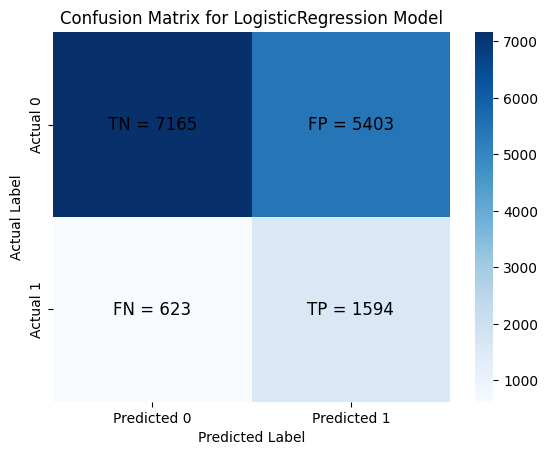

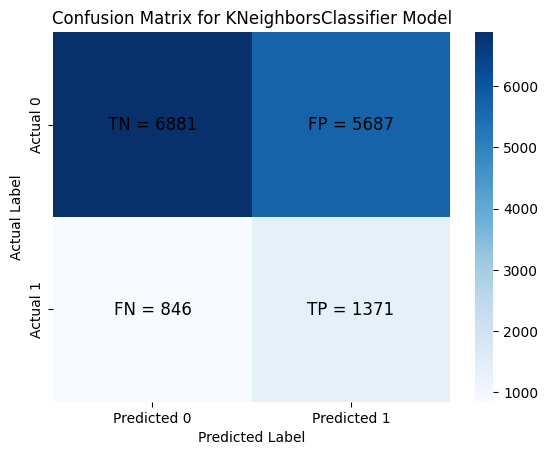

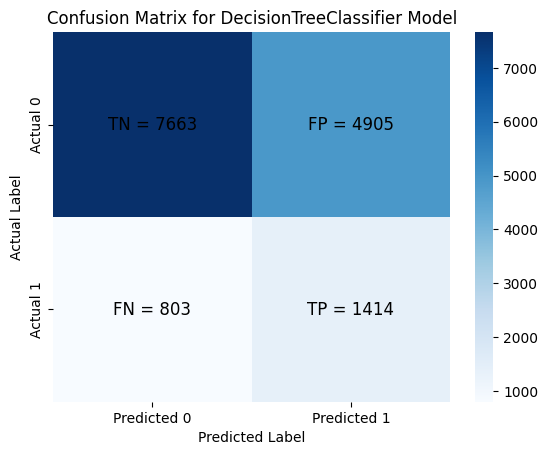

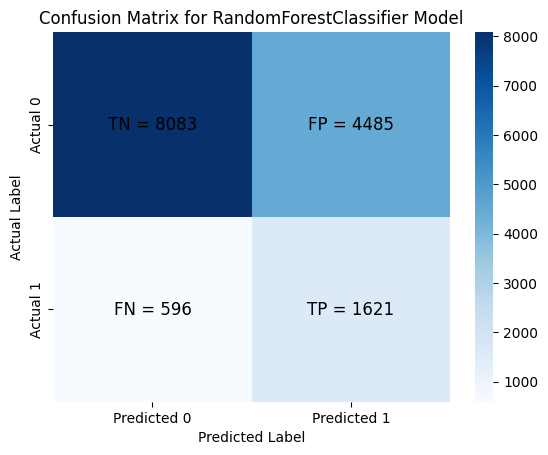

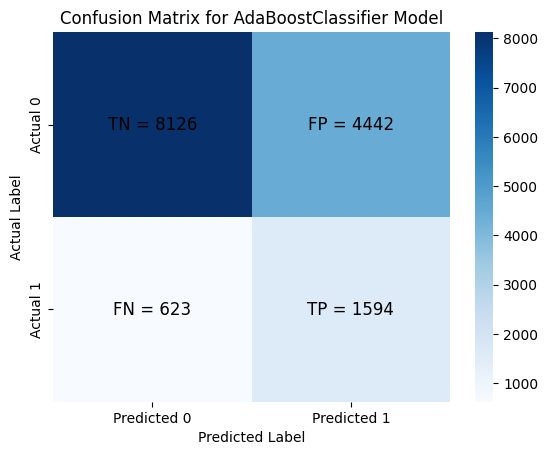

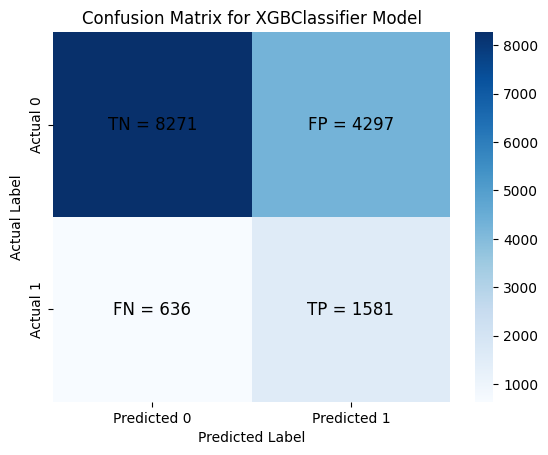

In [71]:
#Confusion matrix of all models

from sklearn.metrics import confusion_matrix

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

for model in models :

    model.fit(x_train_sampled, y_train_sampled)

    y_pred = model.predict(x_test)

    #Make confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    #Plot the confusion matrix in heatmap
    sns.heatmap(conf_mat, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)

    plt.title(f'Confusion Matrix for {type(model).__name__} Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

**Additional Information About confusion_matrix**

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

The `confusion_matrix` function from scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix is typically a 2x2 matrix for binary classification problems.

Here's the breakdown:

```python
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred)
```

The confusion matrix `conf_mat` will be a 2x2 matrix in the form:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- True Negative (TN): The instances that are actually negative (class 0) and are predicted correctly as negative.
- False Positive (FP): The instances that are actually negative (class 0) but are predicted incorrectly as positive.
- False Negative (FN): The instances that are actually positive (class 1) but are predicted incorrectly as negative.
- True Positive (TP): The instances that are actually positive (class 1) and are predicted correctly as positive.

So, in the confusion matrix `conf_mat`, the elements are arranged as follows:

- `conf_mat[0, 0]`: True Negatives (TN)
- `conf_mat[0, 1]`: False Positives (FP)
- `conf_mat[1, 0]`: False Negatives (FN)
- `conf_mat[1, 1]`: True Positives (TP)

These values help evaluate the performance of your binary classification model. The diagonal elements (`conf_mat[0, 0]` and `conf_mat[1, 1]`) represent correct predictions, while the off-diagonal elements represent errors in predictions.

In [72]:
#Printing metrics in form of classification report
from sklearn.metrics import classification_report

def display_classification_reports(model_for_report):
    model_for_report.fit(x_train_sampled, y_train_sampled)
    y_pred = model_for_report.predict(x_test)
    print("Classification Report for", type(model_for_report).__name__)
    print(classification_report(y_test, y_pred))

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# Evaluate and print classification reports for all models
for model in models:
    display_classification_reports(model)

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.57      0.70     12568
           1       0.23      0.72      0.35      2217

    accuracy                           0.59     14785
   macro avg       0.57      0.64      0.52     14785
weighted avg       0.82      0.59      0.65     14785

Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.89      0.55      0.68     12568
           1       0.19      0.62      0.30      2217

    accuracy                           0.56     14785
   macro avg       0.54      0.58      0.49     14785
weighted avg       0.79      0.56      0.62     14785

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.90      0.61      0.73     12568
           1       0.22      0.63      0.33      2217

    accuracy                           0.

**Additional Information About Classification_Report**

1. `from sklearn.metrics import classification_report`: This line imports the `classification_report` function from scikit-learn's `metrics` module. This function is used to generate a text report that includes precision, recall, f1-score, and support for each class.

2. `print(classification_report(y_test, y_pred))`: This line prints the classification report based on the true labels (`y_test`) and the predicted labels (`y_pred`). `y_test` typically represents the actual class labels in your test set, and `y_pred` represents the predicted labels generated by your machine learning model.

Now, regarding the interpretation of the classification report:
- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0 and class 1, precision will be separately calculated.
- Recall: Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. It is also calculated separately for class 0 and class 1.
- F1-score: The F1-score is the weighted average of precision and recall. It is a good way to show a balance between precision and recall.
- Support: Support is the number of actual occurrences of the class in the specified dataset.

The classification report will include these metrics for each class in your classification problem. The classes are typically denoted as 0 and 1 in binary classification problems. Class 0 usually represents the negative class (e.g., non-event or absence of a condition), and Class 1 represents the positive class (e.g., event or presence of a condition).

In the report, you will see values for precision, recall, f1-score, and support for both Class 0 and Class 1. The interpretation of these metrics depends on the context of your specific classification problem. Generally, you would want high values for precision, recall, and f1-score, indicating good performance of your model.

In [73]:
#Printing metrics score for all models to compare

#Logistic Regression
print('Evaluate LogisticRegression')
eval_classification(lg)

#K-Neareest Neighbors Classifier
print('\nEvaluate KNeighborsClassifier')
eval_classification(knn)

#Decision Tree Classifier
print('\nEvaluate DecisionTreeClassifier')
eval_classification(dt)

#Random Forest Classifier
print('\nEvaluate RandomForestClassifier')
eval_classification(rf)

#AdaBoost Classifier
print('\nEvaluate AdaBoostClassifier')
eval_classification(ab)

#XGBoost Classifier
print('\nEvaluate XGBoostClassifier')
eval_classification(xg)

Evaluate LogisticRegression
Accuracy (Test Set): 0.59
Precision (Test Set): 0.23
Recall (Test Set): 0.72
F1-Score (Test Set): 0.35
roc_auc (Train-Proba): 0.70
roc_auc (Test-Proba): 0.68
recall (crossval train): 0.7125477493032081
recall (crossval test): 0.7085314263559213

Evaluate KNeighborsClassifier
Accuracy (Test Set): 0.56
Precision (Test Set): 0.19
Recall (Test Set): 0.62
F1-Score (Test Set): 0.30
roc_auc (Train-Proba): 0.81
roc_auc (Test-Proba): 0.61
recall (crossval train): 0.7498797637757245
recall (crossval test): 0.6150550697166818

Evaluate DecisionTreeClassifier
Accuracy (Test Set): 0.62
Precision (Test Set): 0.23
Recall (Test Set): 0.63
F1-Score (Test Set): 0.33
roc_auc (Train-Proba): 1.00
roc_auc (Test-Proba): 0.63
recall (crossval train): 0.9998202157375239
recall (crossval test): 0.6258326512442739

Evaluate RandomForestClassifier
Accuracy (Test Set): 0.65
Precision (Test Set): 0.26
Recall (Test Set): 0.73
F1-Score (Test Set): 0.39
roc_auc (Train-Proba): 1.00
roc_auc (

The two best models for this case is random forest and xgboost classifier, for further improvement we can do hyperparameter tuning

**SMOTE** (Experiment with SMOTE instead of Undersample)

* Evaluate LogisticRegression
  - Accuracy (Test Set): 0.60
  - Precision (Test Set): 0.23
  - Recall (Test Set): 0.71
  - F1-Score (Test Set): 0.34
  - roc_auc (Test-Proba): 0.68
  - roc_auc (Train-Proba): 0.71

* Evaluate KNeighborsClassifier
  - Accuracy (Test Set): 0.64
  - Precision (Test Set): 0.21
  - Recall (Test Set): 0.50
  - F1-Score (Test Set): 0.29
  - roc_auc (Test-Proba): 0.61
  - roc_auc (Train-Proba): 0.98

* Evaluate DecisionTreeClassifier
  - Accuracy (Test Set): 0.58
  - Precision (Test Set): 0.16
  - Recall (Test Set): 0.43
  - F1-Score (Test Set): 0.23
  - roc_auc (Test-Proba): 0.52
  - roc_auc (Train-Proba): 1.00

* Evaluate RandomForestClassifier
  - Accuracy (Test Set): 0.65
  - Precision (Test Set): 0.23
  - Recall (Test Set): 0.57
  - F1-Score (Test Set): 0.33
  - roc_auc (Test-Proba): 0.67
  - roc_auc (Train-Proba): 1.00

* Evaluate AdaBoostClassifier
  - Accuracy (Test Set): 0.72
  - Precision (Test Set): 0.28
  - Recall (Test Set): 0.56
  - F1-Score (Test Set): 0.37
  - roc_auc (Test-Proba): 0.72
  - roc_auc (Train-Proba): 0.90

* Evaluate XGBoostClassifier
  - Accuracy (Test Set): 0.17
  - Precision (Test Set): 0.15
  - Recall (Test Set): 0.99
  - F1-Score (Test Set): 0.26
  - roc_auc (Test-Proba): 0.59
  - roc_auc (Train-Proba): 0.98

## Feature Importances from Classification Models

This section shows the result of feature_importances_ method that that takes a machine learning model as input, extracts the feature importances from the model

**Additional Information About feature_importances_**

This code defines a function called `show_feature_importance` that takes a machine learning model as input, extracts the feature importances from the model, and then plots a horizontal bar chart to visualize the importance scores of the top 25 features.

Here's a breakdown of the code:

1. `model`: The input to the function is expected to be a trained machine learning model, likely a tree-based model such as a decision tree, random forest, or gradient boosting model.

2. `feat_importances = pd.Series(model.feature_importances_, index=x.columns)`: This line creates a Pandas Series object (`feat_importances`) where the feature importances from the model are stored. The index of the series is set to the column names of the features (`x.columns`).

3. `ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))`: The top 25 features with the highest importance scores are selected using `nlargest(25)`, and a horizontal bar chart (`barh`) is created using Matplotlib. The `ax` variable holds the axes of the plot.

4. `ax.invert_yaxis()`: This inverts the y-axis of the plot, displaying the features with the highest importance at the top.

5. `plt.xlabel('score')`: Sets the x-axis label of the plot to 'score'.

6. `plt.ylabel('feature')`: Sets the y-axis label of the plot to 'feature'.

7. `plt.title('feature importance score')`: Sets the title of the plot to 'feature importance score'.

In machine learning models, feature importance refers to a score assigned to each feature indicating its contribution to the predictive performance of the model. Higher feature importance suggests that the feature has a greater impact on the model's predictions. Feature importance is often used for interpretability, helping to identify which features are the most influential in making predictions.

For tree-based models, feature importance is typically calculated based on metrics such as information gain, Gini impurity, or mean decrease in impurity. It helps in understanding the relative contribution of different features in making decisions within the model.

In [74]:
#Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')

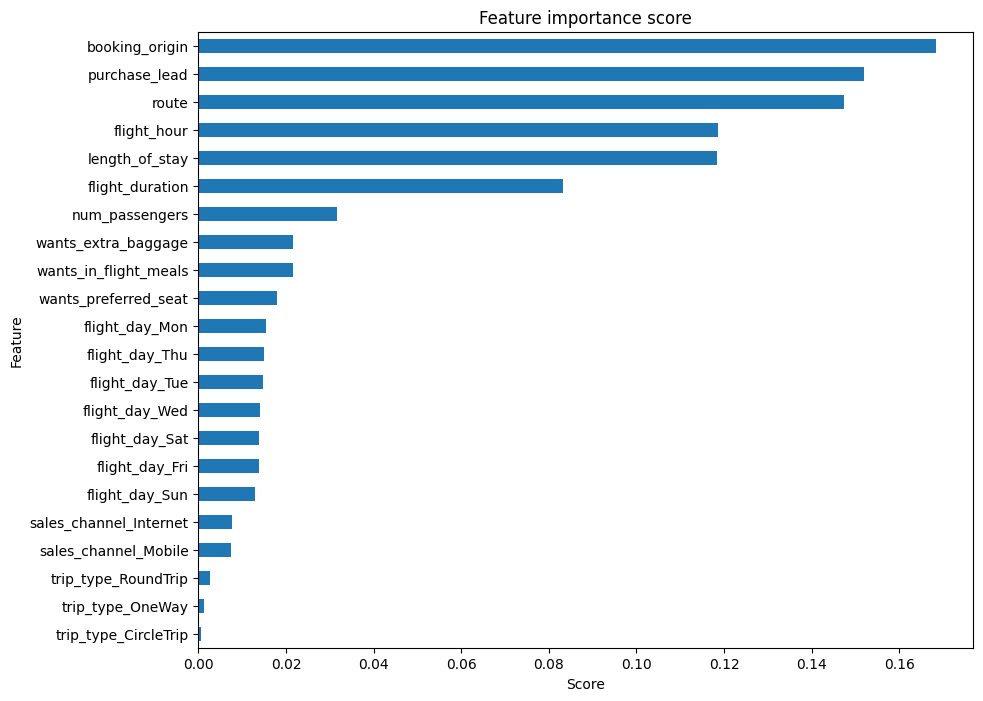

In [75]:
# Feature importance in random forest
show_feature_importance(rf)

In random forest model, the features extracted in one-hot encoding are far less important to the predictive performance of the model.

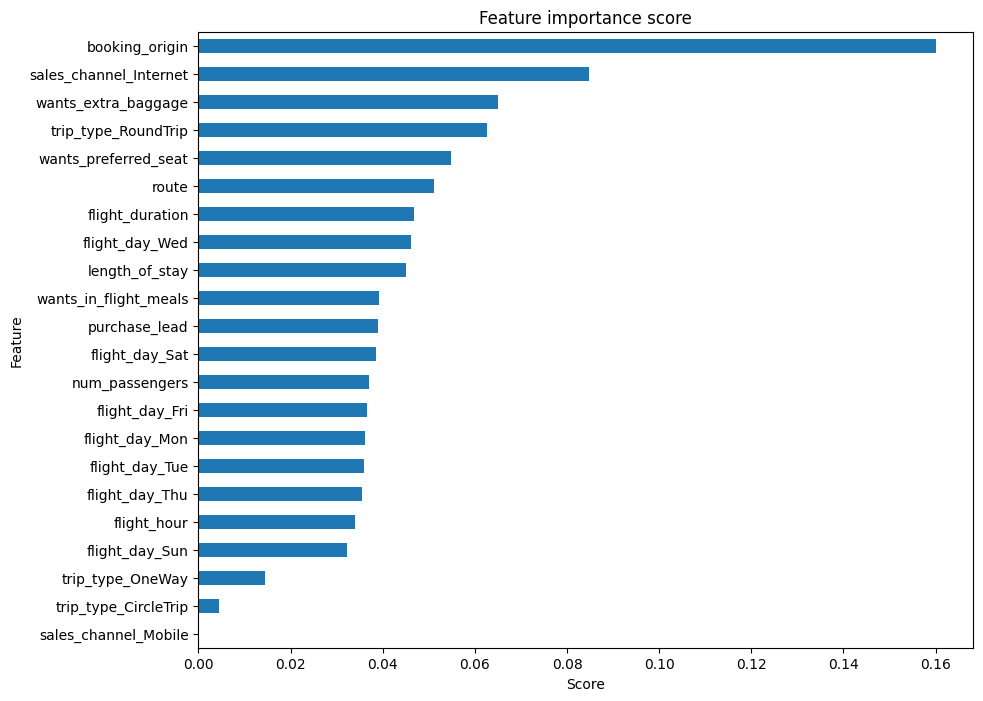

In [76]:
# Feature importance in XGB
show_feature_importance(xg)

In xgb model, the features extracted in one-hot encoding have quite the same importance as the original features. And in this case the booking_origin feature are far more important compared to others.

## Hyperparameter Tuning

**Additional Information About best_estimator_.get_params()**

This code defines a function called `show_best_hyperparameter` that takes a model trained with hyperparameter tuning (using techniques like grid search or randomized search) as input and prints the best hyperparameters found during the tuning process.

Here's an explanation of the code:

1. `model`: The input to the function is expected to be an object that resulted from hyperparameter tuning. This could be, for example, a `GridSearchCV` or `RandomizedSearchCV` object from the scikit-learn library.

2. `model.best_estimator_`: This attribute of the model object holds the best estimator (model) found during the hyperparameter tuning process. It encapsulates both the best hyperparameters and the trained model.

3. `model.best_estimator_.get_params()`: This method retrieves the hyperparameters of the best estimator and prints them. It returns a dictionary where keys are the hyperparameter names, and values are their corresponding values.

So, when you call `show_best_hyperparameter(model)`, it will print the hyperparameters of the best estimator obtained through hyperparameter tuning.

For example, if you have a grid search with various combinations of hyperparameters and you call `grid_search.best_estimator_.get_params()`, it will provide you with the hyperparameters that yielded the best performance on the validation set according to the specified scoring metric.

Initial hyperparameter used are chosen based on some references

In [77]:
#Function for best hyperparameters found during the tuning process
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Hyperparameter Tuning For Random Forest

In [78]:
#Hyperparameter tuning for random forest

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['entropy']
max_depth = [int(x) for x in np.linspace(1, 100, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 50] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 8, 20, 30] # Minimum number of samples required at each leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
# rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.55
Precision (Test Set): 0.22
Recall (Test Set): 0.81
F1-Score (Test Set): 0.35
roc_auc (Train-Proba): 0.75
roc_auc (Test-Proba): 0.73
recall (crossval train): 0.8222663877404118
recall (crossval test): 0.8180717701288073


In [79]:
# Best hyperparameter in random forest
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 143, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [80]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 143,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 4,
 'criterion': 'entropy'}

Param value: 1; train: 0.849712368168744; test: 0.6125394677492106; difference: 0.23717290041953332
Param value: 5; train: 0.964046021093001; test: 0.6608028867839423; difference: 0.3032431343090587
Param value: 9; train: 0.9846596356663471; test: 0.6905728461885431; difference: 0.294086789477804
Param value: 13; train: 0.9920901246404602; test: 0.7054578258908435; difference: 0.2866322987496167
Param value: 17; train: 0.9956855225311602; test: 0.7077131258457375; difference: 0.2879723966854226
Param value: 21; train: 0.99712368168744; test: 0.7122237257555255; difference: 0.28489995593191453
Param value: 25; train: 0.9990412272291467; test: 0.7235002255299955; difference: 0.2755410016991512
Param value: 29; train: 0.9995206136145733; test: 0.7203428055931439; difference: 0.27917780802142944
Param value: 33; train: 0.99928092042186; test: 0.7189896256202075; difference: 0.2802912948016525
Param value: 37; train: 0.9988015340364333; test: 0.731168245376635; difference: 0.267633288659798

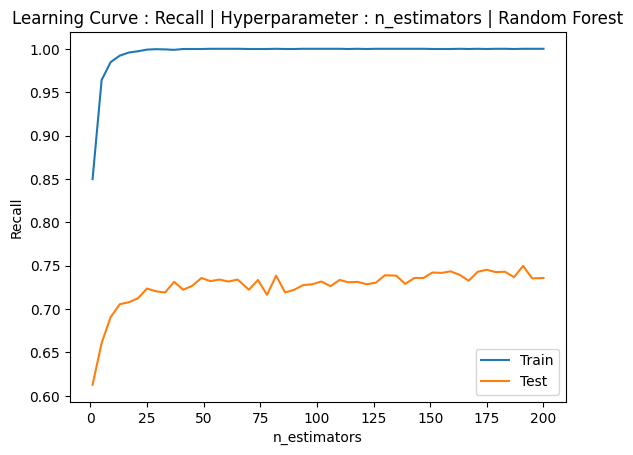

In [81]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.8559443911792904; test: 0.5956130001461423; difference: 0.2603313910331482
Param value: 5; train: 0.9902621480554745; test: 0.672130870132335; difference: 0.31813127792313955
Param value: 9; train: 0.9985257030157678; test: 0.7000179914364639; difference: 0.2985077115793039
Param value: 13; train: 0.9995345171986186; test: 0.7167159861001169; difference: 0.28281853109850175
Param value: 17; train: 0.9999096554301194; test: 0.7201443722155084; difference: 0.279765283214611
Param value: 21; train: 0.9999752665581345; test: 0.7233648680541858; difference: 0.27661039850394875
Param value: 25; train: 0.9999814140105842; test: 0.7248427821931507; difference: 0.2751386318174335
Param value: 29; train: 0.9999945707078831; test: 0.7237529957015792; difference: 0.27624157500630386
Param value: 33; train: 0.9999978742454145; test: 0.7308441267596292; difference: 0.26915374748578536
Param value: 37; train: 0.9999982476887878; test: 0.7342549449353657; difference: 0.2657433

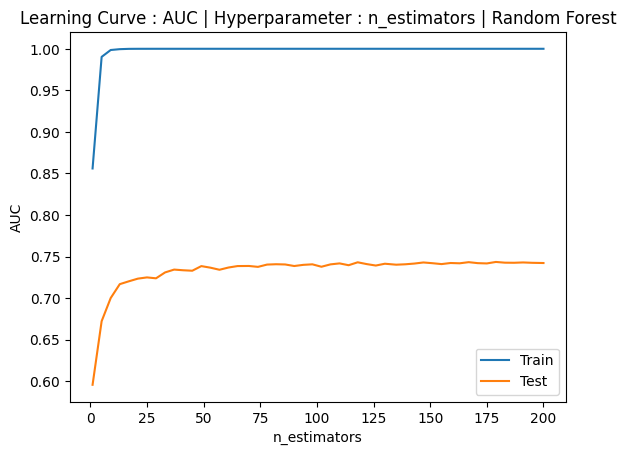

In [82]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.8741610738255033; test: 0.8687415426251691; difference: 0.005419531200334227
Param value: 4; train: 0.8326941514860978; test: 0.8299503834009924; difference: 0.002743768085105458
Param value: 7; train: 0.8151965484180249; test: 0.7861975642760487; difference: 0.028998984141976214
Param value: 11; train: 0.8604985618408437; test: 0.7496617050067659; difference: 0.11083685683407785
Param value: 14; train: 0.9381591562799616; test: 0.7406405051871899; difference: 0.19751865109277167
Param value: 18; train: 0.9925695110258869; test: 0.7456021650879567; difference: 0.24696734593793013
Param value: 21; train: 1.0; test: 0.7347767253044655; difference: 0.2652232746955345
Param value: 24; train: 0.9997603068072867; test: 0.7320703653585927; difference: 0.26768994144869396
Param value: 28; train: 0.9997603068072867; test: 0.731168245376635; difference: 0.2685920614306516
Param value: 31; train: 1.0; test: 0.7352277852954443; difference: 0.2647722147045557
Param value: 3

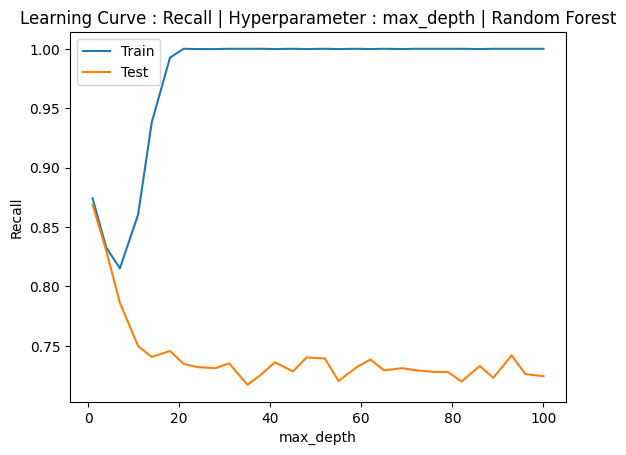

In [83]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.7039921786019934; test: 0.6868263170678977; difference: 0.017165861534095717
Param value: 4; train: 0.7548391366816534; test: 0.7289526392751802; difference: 0.025886497406473197
Param value: 7; train: 0.7976994049725651; test: 0.7377192206108287; difference: 0.059980184361736355
Param value: 11; train: 0.906438847441143; test: 0.7453927495049394; difference: 0.1610460979362036
Param value: 14; train: 0.9790112471951531; test: 0.7448016843401215; difference: 0.23420956285503158
Param value: 18; train: 0.9996809357272931; test: 0.7439240769276928; difference: 0.2557568587996003
Param value: 21; train: 0.9999968688209484; test: 0.7417410585467828; difference: 0.25825581027416555
Param value: 24; train: 0.9999999712735868; test: 0.7378700464870293; difference: 0.2621299247865575
Param value: 28; train: 0.9999999712735868; test: 0.7411400878633854; difference: 0.2588598834102014
Param value: 31; train: 0.9999999712735866; test: 0.7396779112965118; difference: 0.260

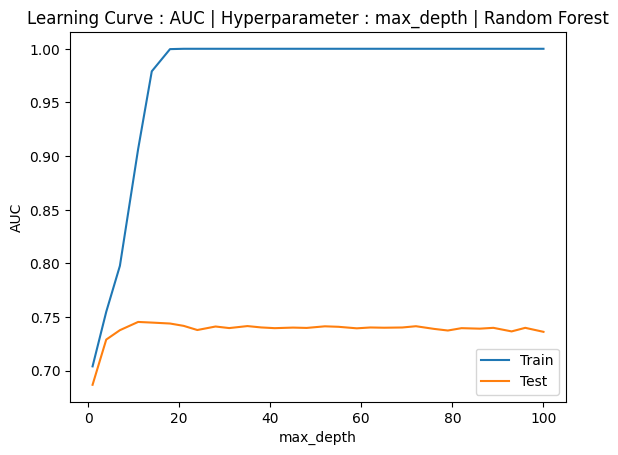

In [84]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 2; train: 0.9997603068072867; test: 0.7307171853856563; difference: 0.26904312142163034
Param value: 5; train: 0.9748322147651006; test: 0.7410915651781687; difference: 0.23374064958693197
Param value: 10; train: 0.9187440076701822; test: 0.7447000451059991; difference: 0.17404396256418309
Param value: 50; train: 0.8209491850431447; test: 0.7564276048714479; difference: 0.06452158017169685


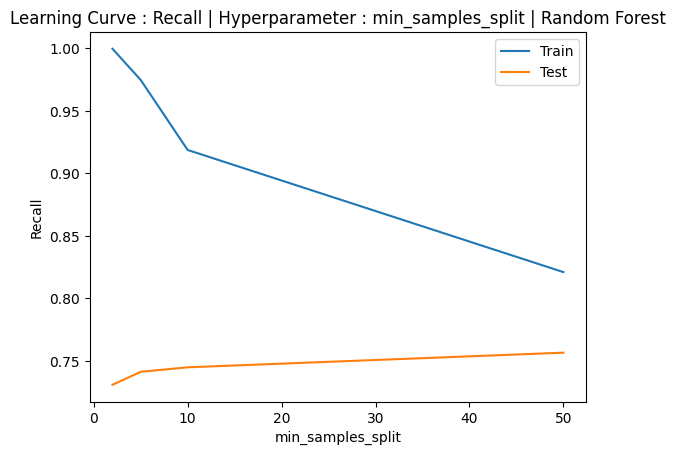

In [85]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 2; train: 0.9999999712735866; test: 0.7427188516661513; difference: 0.2572811196074354
Param value: 5; train: 0.9986066827749072; test: 0.7398209491381769; difference: 0.2587857336367303
Param value: 10; train: 0.9769683970385596; test: 0.7450428442390221; difference: 0.23192555279953753
Param value: 50; train: 0.8569400199384289; test: 0.7452814200895976; difference: 0.11165859984883131


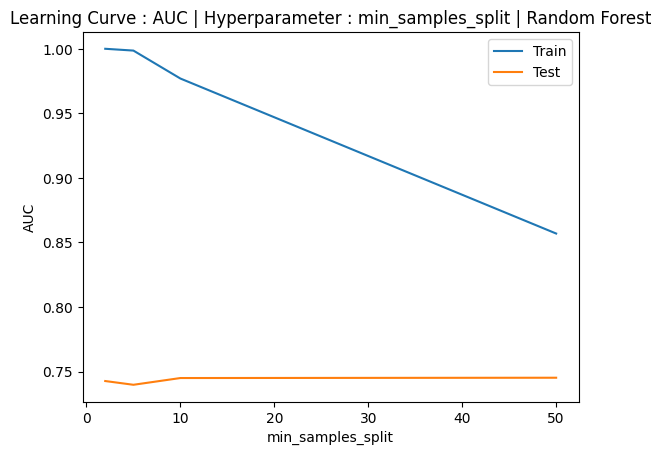

In [86]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 1.0; test: 0.7271087054578259; difference: 0.2728912945421741
Param value: 2; train: 0.950862895493768; test: 0.7465042850699143; difference: 0.20435861042385373
Param value: 5; train: 0.8657718120805369; test: 0.7559765448804691; difference: 0.10979526720006783
Param value: 8; train: 0.8302972195589645; test: 0.7537212449255751; difference: 0.07657597463338939
Param value: 20; train: 0.8015340364333653; test: 0.747406405051872; difference: 0.054127631381493346
Param value: 30; train: 0.7900287631831256; test: 0.7595850248082995; difference: 0.030443738374826168


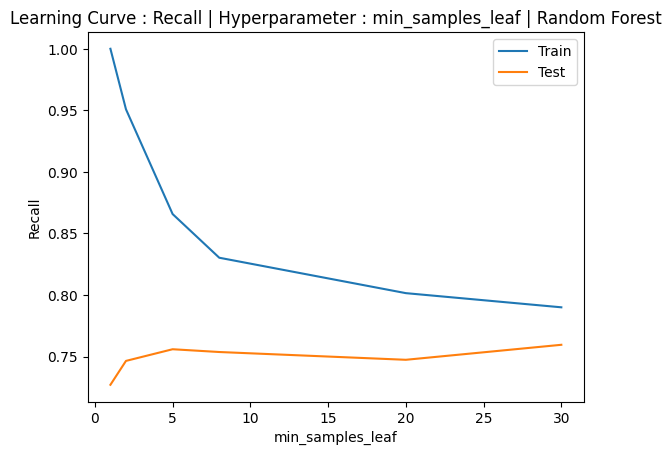

In [87]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9999999712735866; test: 0.7398268709155886; difference: 0.260173100357998
Param value: 2; train: 0.9933853698904902; test: 0.7451334833229827; difference: 0.24825188656750752
Param value: 5; train: 0.9267201548652433; test: 0.7471608845714227; difference: 0.17955927029382057
Param value: 8; train: 0.8839694491147209; test: 0.7444409583718429; difference: 0.139528490742878
Param value: 20; train: 0.8213895896857009; test: 0.742579151553573; difference: 0.07881043813212785
Param value: 30; train: 0.8024059692567627; test: 0.7408756894743385; difference: 0.0615302797824242


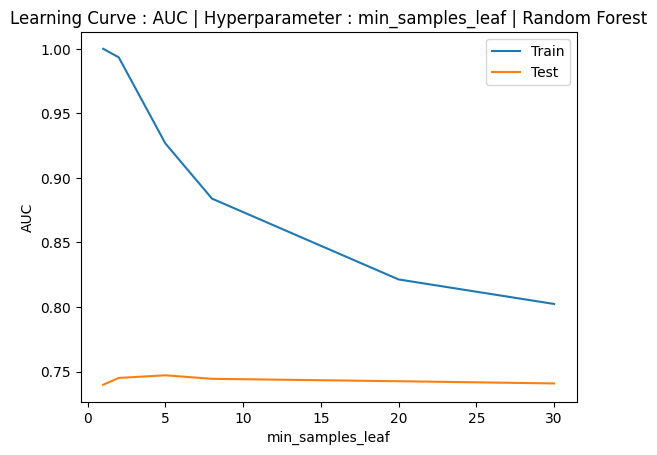

In [88]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 30)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 8, 20, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### Hyperparameter Tuning For XGBoost

In [89]:
#Hyperparameter tuning for xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Initiate hyperparameters used and their values
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_child_weight = [int(x) for x in np.linspace(1, 20, num = 11)]
gamma = [float(x) for x in np.linspace(0, 1, num = 11)]
tree_method = ['auto', 'exact', 'approx']
colsample_bytree = [float(x) for x in np.linspace(0, 1, num = 11)]
eta = [float(x) for x in np.linspace(0, 1, num = 100)]
# lambda = [float(x) for x in np.linspace(0, 1, num = 11)]
alpha = [float(x) for x in np.linspace(0, 1, num = 11)]


#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(max_depth = max_depth,
                       min_child_weight = min_child_weight,
                       min_samples_leaf = min_samples_leaf,
                       gamma = gamma,
                       tree_method = tree_method,
                       colsample_bytree = colsample_bytree,
                       eta = eta,
                    #    lambda = lambda,
                       alpha = alpha
                      )

#Initiate tuned model
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
# xg_tuned = GridSearchCV(xg, hyperparameters, cv=5, scoring='recall')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=42, cv=5, scoring='recall')
xg_tuned.fit(x_train_sampled,y_train_sampled)

#Tuned model evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.28
Recall (Test Set): 0.73
F1-Score (Test Set): 0.40
roc_auc (Train-Proba): 0.87
roc_auc (Test-Proba): 0.75
recall (crossval train): 0.8169339969293213
recall (crossval test): 0.7466353623687876


In [90]:
# Best hyperparameter in xgb
show_best_hyperparameter(xg_tuned)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.2, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 1.0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 50, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'approx', 'validate_parameters': None, 'verbosity': None, 'min_samples_leaf': 5, 'eta': 0.12121212121212122, 'alpha': 0.9}


In [91]:
# Retrieving the best hyperparameters for xgb (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = xg_tuned.best_params_
best_params

{'tree_method': 'approx',
 'min_samples_leaf': 5,
 'min_child_weight': 1,
 'max_depth': 50,
 'gamma': 1.0,
 'eta': 0.12121212121212122,
 'colsample_bytree': 0.2,
 'alpha': 0.9}

Param value: 10; train: 0.9997603068072867; test: 0.7095173658096526; difference: 0.29024294099763404
Param value: 20; train: 1.0; test: 0.6820027063599459; difference: 0.31799729364005414
Param value: 30; train: 1.0; test: 0.6955345060893099; difference: 0.3044654939106901
Param value: 40; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935
Param value: 50; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935
Param value: 60; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935
Param value: 70; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935
Param value: 80; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935
Param value: 90; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935
Param value: 100; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935
Param value: 110; train: 1.0; test: 0.6801984663960307; difference: 0.31980153360396935


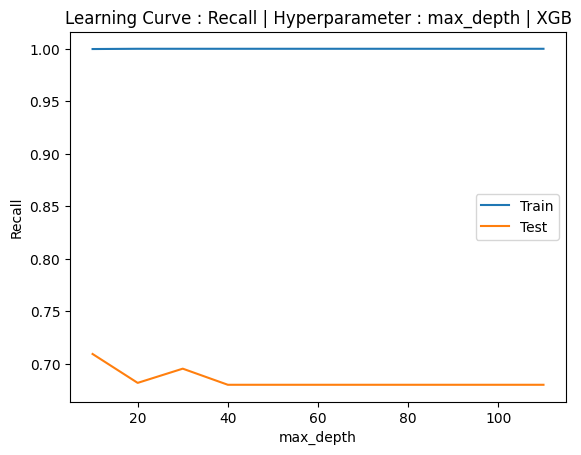

In [92]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : max_depth | XGB') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 10; train: 0.9999992243868404; test: 0.7282390471522782; difference: 0.27176017723456225
Param value: 20; train: 0.9999999712735868; test: 0.7214917739692734; difference: 0.2785081973043133
Param value: 30; train: 0.9999999712735868; test: 0.7230066005207719; difference: 0.2769933707528148
Param value: 40; train: 0.9999999712735866; test: 0.7221637700920525; difference: 0.2778362011815342
Param value: 50; train: 0.9999999712735866; test: 0.7221637700920525; difference: 0.2778362011815342
Param value: 60; train: 0.9999999712735866; test: 0.7221637700920525; difference: 0.2778362011815342
Param value: 70; train: 0.9999999712735866; test: 0.7221637700920525; difference: 0.2778362011815342
Param value: 80; train: 0.9999999712735866; test: 0.7221637700920525; difference: 0.2778362011815342
Param value: 90; train: 0.9999999712735866; test: 0.7221637700920525; difference: 0.2778362011815342
Param value: 100; train: 0.9999999712735866; test: 0.7221637700920525; difference: 0.27783

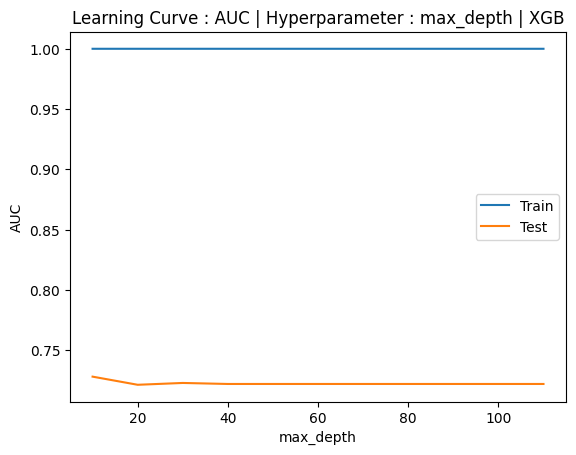

In [93]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : max_depth | XGB') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9132310642377757; test: 0.713125845737483; difference: 0.20010521850029261
Param value: 2; train: 0.9034036433365292; test: 0.6937302661253947; difference: 0.20967337721113455
Param value: 4; train: 0.8902205177372963; test: 0.7090663058186739; difference: 0.18115421191862235
Param value: 6; train: 0.8763183125599233; test: 0.7149300857013983; difference: 0.16138822685852505
Param value: 8; train: 0.8569031639501438; test: 0.7329724853405503; difference: 0.1239306786095935
Param value: 10; train: 0.8463566634707574; test: 0.7072620658547587; difference: 0.13909459761599874
Param value: 12; train: 0.8513902205177373; test: 0.7266576454668471; difference: 0.1247325750508902
Param value: 14; train: 0.8384467881112176; test: 0.7284618854307623; difference: 0.10998490268045535
Param value: 16; train: 0.8322147651006712; test: 0.7388362652232747; difference: 0.09337849987739644
Param value: 18; train: 0.8281399808245445; test: 0.7171853856562923; difference: 0.110954

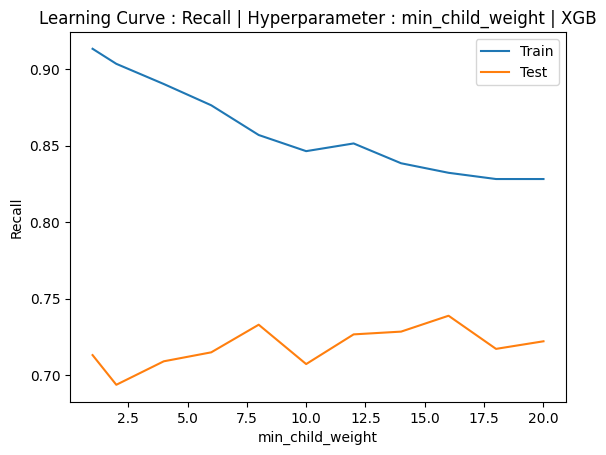

In [94]:
#Learning curve for hyperparameters (min_child_weight)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(min_child_weight=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_child_weight | XGB') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_child_weight') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9676797400190651; test: 0.7366523496033631; difference: 0.23102739041570197
Param value: 2; train: 0.965743263770983; test: 0.7355267273860601; difference: 0.2302165363849229
Param value: 4; train: 0.9511733418424799; test: 0.740036878676347; difference: 0.21113646316613288
Param value: 6; train: 0.9409628829460707; test: 0.7371879115635301; difference: 0.20377497138254053
Param value: 8; train: 0.9255011782425685; test: 0.7435220241309917; difference: 0.18197915411157684
Param value: 10; train: 0.9150664235109837; test: 0.7415039003338304; difference: 0.17356252317715326
Param value: 12; train: 0.9173806808205918; test: 0.7432024455433349; difference: 0.17417823527725684
Param value: 14; train: 0.9076816669868704; test: 0.7410899860375255; difference: 0.16659168094934484
Param value: 16; train: 0.9040016698089532; test: 0.7446320523344435; difference: 0.15936961747450973
Param value: 18; train: 0.8982974371902718; test: 0.7394630943347037; difference: 0.158834

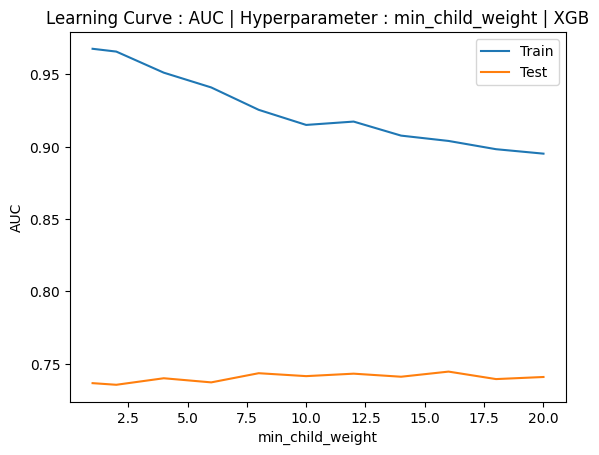

In [95]:
#Learning curve for hyperparameters (min_child_weight)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(min_child_weight=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_child_weight | XGB') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_child_weight') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.9132310642377757; test: 0.713125845737483; difference: 0.20010521850029261
Param value: 0.1; train: 0.9153883029721956; test: 0.7117726657645467; difference: 0.20361563720764897
Param value: 0.2; train: 0.887823585810163; test: 0.713125845737483; difference: 0.1746977400726799
Param value: 0.30000000000000004; train: 0.8643336529242569; test: 0.7325214253495715; difference: 0.13181222757468536
Param value: 0.4; train: 0.8499520613614573; test: 0.7275597654488047; difference: 0.12239229591265255
Param value: 0.5; train: 0.8456375838926175; test: 0.7262065854758682; difference: 0.1194309984167492
Param value: 0.6000000000000001; train: 0.8384467881112176; test: 0.7352277852954443; difference: 0.10321900281577334
Param value: 0.7000000000000001; train: 0.837248322147651; test: 0.7433468651330627; difference: 0.0939014570145883
Param value: 0.8; train: 0.8290987535953979; test: 0.7347767253044655; difference: 0.09432202829093239
Param value: 0.9; train: 0.8202301

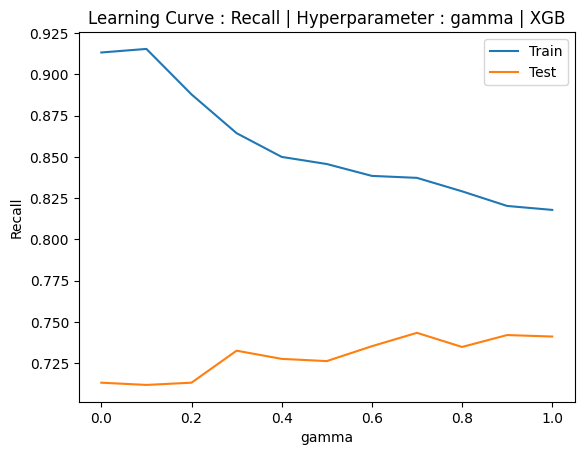

In [96]:
#Learning curve for hyperparameters (gamma)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(gamma=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : gamma | XGB') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('gamma') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.9676797400190651; test: 0.7366523496033631; difference: 0.23102739041570197
Param value: 0.1; train: 0.9701929851937171; test: 0.7336487523209778; difference: 0.2365442328727393
Param value: 0.2; train: 0.9492789497899066; test: 0.7380132996660549; difference: 0.21126565012385168
Param value: 0.30000000000000004; train: 0.9303063315772686; test: 0.7445811968278222; difference: 0.1857251347494464
Param value: 0.4; train: 0.9149163567278179; test: 0.7438329174451112; difference: 0.17108343928270675
Param value: 0.5; train: 0.9048128175417727; test: 0.743123685903758; difference: 0.16168913163801468
Param value: 0.6000000000000001; train: 0.9055663688158926; test: 0.7456258701423839; difference: 0.15994049867350868
Param value: 0.7000000000000001; train: 0.8962005813766434; test: 0.746815824396115; difference: 0.14938475698052833
Param value: 0.8; train: 0.8922494068570178; test: 0.7444878839716362; difference: 0.14776152288538158
Param value: 0.9; train: 0.8794

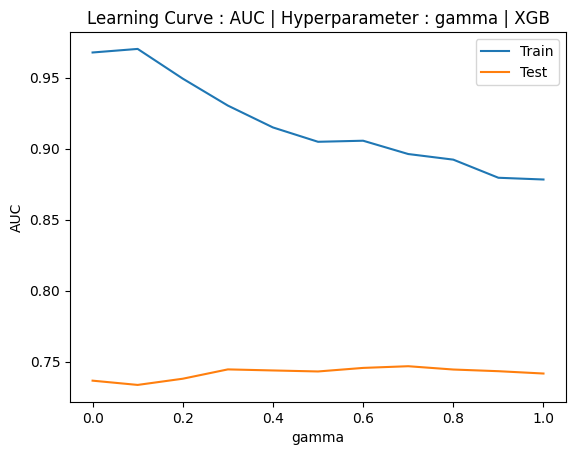

In [97]:
#Learning curve for hyperparameters (gamma)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(gamma=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : gamma | XGB') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('gamma') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.7483221476510067; test: 0.7185385656292287; difference: 0.029783582021778
Param value: 0.1; train: 0.7778044103547459; test: 0.6829048263419035; difference: 0.09489958401284238
Param value: 0.2; train: 0.8329338446788112; test: 0.6761389264772215; difference: 0.15679491820158964
Param value: 0.30000000000000004; train: 0.8537871524448706; test: 0.6937302661253947; difference: 0.1600568863194759
Param value: 0.4; train: 0.8693672099712368; test: 0.6968876860622463; difference: 0.17247952390899057
Param value: 0.5; train: 0.8914189837008629; test: 0.7113216057735678; difference: 0.18009737792729508
Param value: 0.6000000000000001; train: 0.9014860977948226; test: 0.6914749661705006; difference: 0.21001113162432195
Param value: 0.7000000000000001; train: 0.9005273250239694; test: 0.7013982859720342; difference: 0.19912903905193513
Param value: 0.8; train: 0.9034036433365292; test: 0.7095173658096526; difference: 0.1938862775268766
Param value: 0.9; train: 0.9062

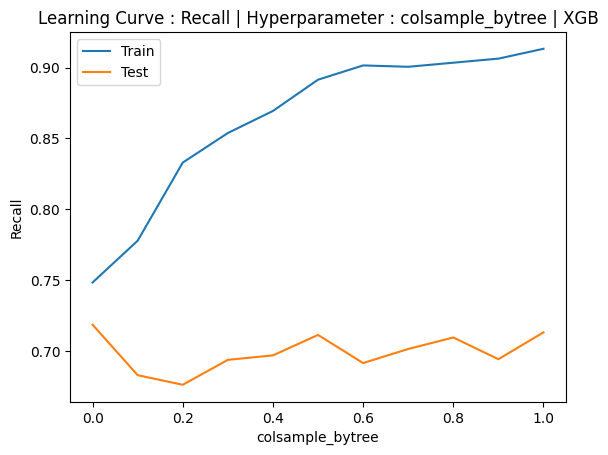

In [98]:
#Learning curve for hyperparameters (colsample_bytree)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(colsample_bytree=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : colsample_bytree | XGB') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('colsample_bytree') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.7959736082397465; test: 0.7196357274253949; difference: 0.07633788081435156
Param value: 0.1; train: 0.8350576745945439; test: 0.729855333490099; difference: 0.10520234110444493
Param value: 0.2; train: 0.8892724024657834; test: 0.7330584049473615; difference: 0.1562139975184219
Param value: 0.30000000000000004; train: 0.918549443672789; test: 0.7312721994873822; difference: 0.1872772441854068
Param value: 0.4; train: 0.934945561148652; test: 0.7373150144405233; difference: 0.19763054670812874
Param value: 0.5; train: 0.9525019384583705; test: 0.7392754457698699; difference: 0.21322649268850058
Param value: 0.6000000000000001; train: 0.9574916015458027; test: 0.7357382604531215; difference: 0.2217533410926812
Param value: 0.7000000000000001; train: 0.9629205489456717; test: 0.7356624078679104; difference: 0.22725814107776132
Param value: 0.8; train: 0.9625107379332978; test: 0.7391401241836202; difference: 0.2233706137496776
Param value: 0.9; train: 0.9649746

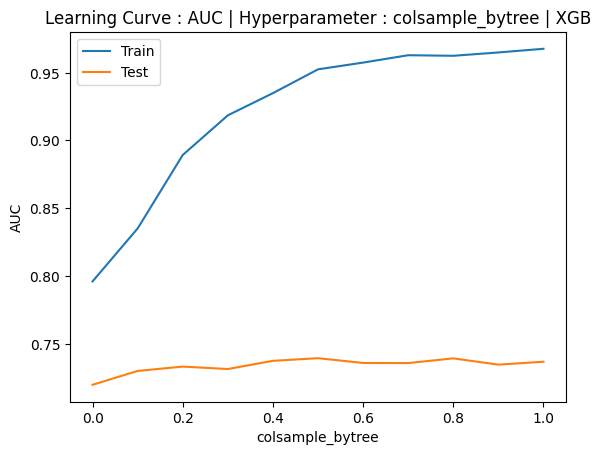

In [99]:
#Learning curve for hyperparameters (colsample_bytree)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(colsample_bytree=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : colsample_bytree | XGB') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('colsample_bytree') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.0; test: 0.0; difference: 0.0
Param value: 0.010101010101010102; train: 0.7842761265580057; test: 0.7713125845737483; difference: 0.01296354198425742
Param value: 0.020202020202020204; train: 0.799137104506232; test: 0.772214704555706; difference: 0.026922399950526033
Param value: 0.030303030303030304; train: 0.8032118887823586; test: 0.7609382047812359; difference: 0.04227368400112275
Param value: 0.04040404040404041; train: 0.8056088207094918; test: 0.7456021650879567; difference: 0.060006655621535065
Param value: 0.05050505050505051; train: 0.8084851390220518; test: 0.7374830852503383; difference: 0.07100205377171342
Param value: 0.06060606060606061; train: 0.8147171620325983; test: 0.7383852052322959; difference: 0.07633195680030236
Param value: 0.07070707070707072; train: 0.8156759348034516; test: 0.7298150654036987; difference: 0.0858608693997529
Param value: 0.08080808080808081; train: 0.8192713326941515; test: 0.7334235453315291; difference: 0.0858477

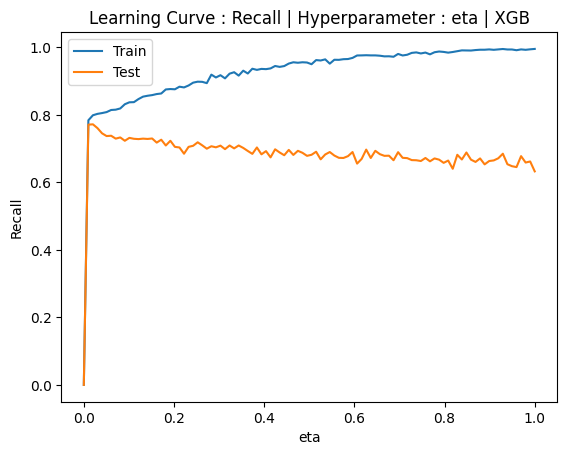

In [100]:
#Learning curve for hyperparameters (eta)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(eta=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : eta | XGB') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('eta') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.5; test: 0.5; difference: 0.0
Param value: 0.010101010101010102; train: 0.799769344136916; test: 0.7351338084823971; difference: 0.06463553565451896
Param value: 0.020202020202020204; train: 0.8176559315677083; test: 0.7422604343153578; difference: 0.07539549725235051
Param value: 0.030303030303030304; train: 0.8341906252614104; test: 0.7456547971278016; difference: 0.08853582813360883
Param value: 0.04040404040404041; train: 0.848150340718243; test: 0.7459547082365392; difference: 0.10219563248170382
Param value: 0.05050505050505051; train: 0.8573980913251746; test: 0.7462027768757535; difference: 0.1111953144494211
Param value: 0.06060606060606061; train: 0.8666370803760448; test: 0.7483861541522642; difference: 0.11825092622378064
Param value: 0.07070707070707072; train: 0.8754229102568464; test: 0.7464394864692052; difference: 0.12898342378764116
Param value: 0.08080808080808081; train: 0.8785203357727037; test: 0.7486110740252325; difference: 0.129909261

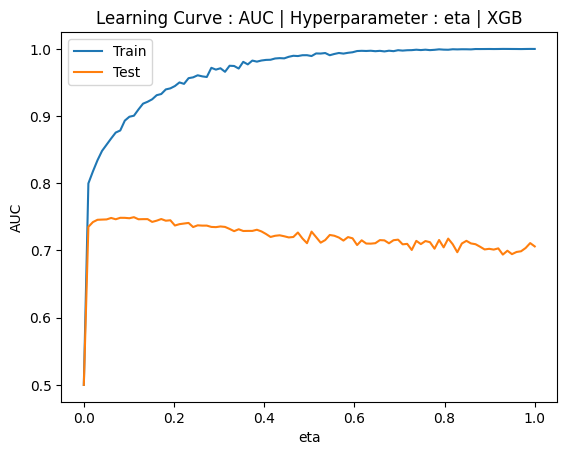

In [101]:
#Learning curve for hyperparameters (eta)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(eta=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : eta | XGB') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('eta') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.9132310642377757; test: 0.713125845737483; difference: 0.20010521850029261
Param value: 0.1; train: 0.9115532118887824; test: 0.7009472259810555; difference: 0.21060598590772683
Param value: 0.2; train: 0.9129913710450623; test: 0.7090663058186739; difference: 0.20392506522638842
Param value: 0.30000000000000004; train: 0.9110738255033557; test: 0.6937302661253947; difference: 0.21734355937796102
Param value: 0.4; train: 0.9173058485139022; test: 0.7059088858818223; difference: 0.21139696263207985
Param value: 0.5; train: 0.9213806327900288; test: 0.7041046459179071; difference: 0.21727598687212168
Param value: 0.6000000000000001; train: 0.9201821668264621; test: 0.7077131258457375; difference: 0.2124690409807246
Param value: 0.7000000000000001; train: 0.9146692233940557; test: 0.7004961659900767; difference: 0.21417305740397896
Param value: 0.8; train: 0.9156279961649089; test: 0.6869643662607127; difference: 0.2286636299041962
Param value: 0.9; train: 0.919

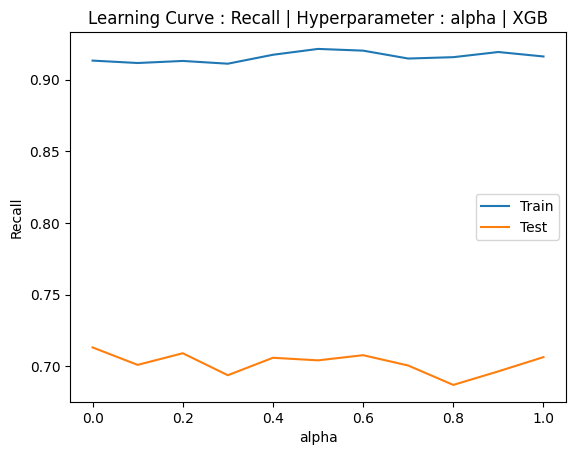

In [102]:
#Learning curve for hyperparameters (alpha)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = ['auto', 'exact', 'approx', 'hist'] #tree_method
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(alpha=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : alpha | XGB') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('alpha') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 0.0; train: 0.9676797400190651; test: 0.7366523496033631; difference: 0.23102739041570197
Param value: 0.1; train: 0.9697147478648231; test: 0.7367888734898749; difference: 0.23292587437494827
Param value: 0.2; train: 0.9682719924824126; test: 0.7362189293311594; difference: 0.23205306315125318
Param value: 0.30000000000000004; train: 0.9701909168919584; test: 0.7353604689990286; difference: 0.23483044789292973
Param value: 0.4; train: 0.9690643818673365; test: 0.7343250193014055; difference: 0.23473936256593098
Param value: 0.5; train: 0.9734673366891913; test: 0.7325224123124735; difference: 0.24094492437671777
Param value: 0.6000000000000001; train: 0.9711217101362413; test: 0.7337408987664615; difference: 0.23738081136977973
Param value: 0.7000000000000001; train: 0.9694923479729264; test: 0.7389979656361769; difference: 0.23049438233674946
Param value: 0.8; train: 0.9708740884534526; test: 0.7331159718017162; difference: 0.2377581166517364
Param value: 0.9; train: 0.9

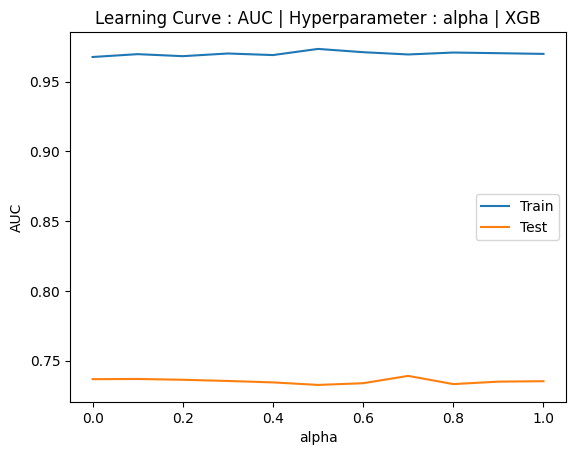

In [103]:
#Learning curve for hyperparameters (alpha)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(10, 110, num = 11)] #max_depth
# param_values = [int(x) for x in np.linspace(1, 20, num = 11)] #min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #gamma
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #lambda
param_values = [float(x) for x in np.linspace(0, 1, num = 11)] #alpha

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = XGBClassifier(alpha=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : alpha | XGB') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('alpha') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

# Model Deployment

## Save Model

**Additional Information About Libraries for Saving Model**

Both `pickle` and `joblib` are Python libraries that provide ways to serialize and deserialize objects, including machine learning models. They are used for saving and loading Python objects, and each has its own advantages and use cases.

Here are some key differences between `pickle` and `joblib`:

1. **Performance:**
   - `joblib` is generally more efficient in terms of serialization and deserialization speed, especially for large NumPy arrays and objects with large data structures.
   - `pickle` might be slower than `joblib` for certain use cases.

2. **Dependencies:**
   - `pickle` is a standard library module in Python, so it comes pre-installed with Python. It doesn't have external dependencies beyond the standard library.
   - `joblib` is an external library that you need to install separately using `pip install joblib`. It is not included in the standard library, but it is commonly used in the scientific computing and machine learning community.

3. **Handling NumPy arrays:**
   - `joblib` is particularly optimized for handling NumPy arrays, making it a good choice for saving and loading large numerical datasets efficiently.
   - `pickle` can also handle NumPy arrays, but `joblib` may be more performant for this specific use case.

4. **Compression:**
   - `joblib` supports optional compression, which can be beneficial when dealing with large datasets. You can compress the serialized file to reduce storage space and speed up the I/O operations.
   - `pickle` does not have built-in compression, but you can use external compression libraries in conjunction with `pickle` if needed.

5. **Compatibility:**
   - `pickle` is a standard library module that is widely available and compatible across different Python environments.
   - `joblib` is not a standard library module, so you need to ensure that it is available in your Python environment. While it is commonly used in data science and machine learning environments, it may not be available in every Python environment.

In summary, both `pickle` and `joblib` are suitable for saving and loading machine learning models, but `joblib` is often preferred for its performance benefits, especially when dealing with large numerical datasets. If you are working in a machine learning or scientific computing context, `joblib` might be a good choice. However, for basic serialization needs, `pickle` is a reliable and built-in option.

In [104]:
# Save random forest model

joblib.dump(rf_tuned, 'tuned_random_forest_model.joblib')

['tuned_random_forest_model.joblib']

In [105]:
# Save XGB model

joblib.dump(xg_tuned, 'tuned_xgb_model.joblib')

['tuned_xgb_model.joblib']

In [106]:
# # Install steamlit if you haven't

# pip install streamlit

Problem solving for error installing streamlit

https://youtu.be/zHAM5MGehV8?si=9KkUKX2PBg42sM-M

- The deployment will be done in a separate python file : model_deployment.py

- To run in terminal : streamlit run model_deployment.py

## **Additional Information About Model Deployment Using Streamlit**

**Scaling Process**

When you use MinMaxScaler or any other scaling technique during preprocessing to scale your features to a specific range (e.g., 0 to 1), it's important to use the same scaling on the input features during deployment.

Here's why:

1. **Consistency:** The model has been trained on the scaled features, so it expects input features to be in the same scale. If you provide unscaled features during testing or deployment, the model may not perform as expected.

2. **Normalization:** Many machine learning models, especially distance-based models or models with gradient-based optimization, benefit from normalized features. Normalization ensures that all features contribute equally to the model's learning process.

Therefore, when deploying your model, make sure to apply the same scaling transformation to the input features that you used during the preprocessing stage. This could involve using the MinMaxScaler (or any other scaler) with the same parameters that were used during training.

Here's an example of how you can use the scaler for deployment:

```python
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('your_model_file.joblib')

# Load the scaler used during training
scaler = joblib.load('your_scaler_file.joblib')

# Create a Streamlit interface to take user input and make predictions
st.title('Your Machine Learning Model Deployment')

# Add input elements for the features
input_feature1 = st.number_input('Feature 1')
input_feature2 = st.number_input('Feature 2')
# Add more input features as needed

# Organize the user inputs into a list or array
user_inputs = [[input_feature1, input_feature2, ...]]

# Scale the user inputs using the same scaler
scaled_inputs = scaler.transform(user_inputs)

# Make predictions
prediction = model.predict(scaled_inputs)

# Display the prediction
st.success(f'The predicted class is {prediction[0]}')
```

In this example, `your_scaler_file.joblib` is the file where you saved the MinMaxScaler during training. Make sure to adjust the file names and paths based on your specific setup.

Using the same scaling parameters ensures that the model receives input features in the same scale it has seen during training, leading to more reliable predictions.

**Features Used**

The number of input elements in your Streamlit app should be based on the total number of features after the encoding process. When you perform feature engineering such as one-hot encoding and count/frequency encoding, you create additional features based on the original ones.

For example, if your original dataset had 5 categorical features and 8 numerical features, and after encoding, you end up with 20 features (10 from one-hot encoding and 10 from count/frequency encoding), then your Streamlit app should have input elements for all 20 features.

In the modified Streamlit code, you'll need to add input elements for each of the engineered features. Here's a general example:

```python
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('your_model_file.joblib')

# Create a Streamlit interface to take user input and make predictions
st.title('Your Machine Learning Model Deployment')

# Add input elements for the encoded features
# Replace these with the actual names of your features
input_feature1 = st.slider('Feature 1', min_value=0.0, max_value=10.0, value=5.0)
input_feature2 = st.slider('Feature 2', min_value=0.0, max_value=10.0, value=5.0)
# Repeat this for all 20 features after encoding

# When the user clicks the 'Predict' button, make predictions using the loaded model
if st.button('Predict'):
    # Organize the user inputs into a list or array
    user_inputs = [input_feature1, input_feature2, ..., input_feature20]

    # Make predictions
    prediction = model.predict([user_inputs])

    # Display the prediction
    st.success(f'The predicted class is {prediction[0]}')
```

Make sure to adjust the input elements and their names based on your specific feature names after the encoding process. If you performed one-hot encoding, you might have binary features, and sliders might not be the best choice. You might need to use other Streamlit input elements, such as checkboxes or text inputs, depending on the nature of your encoded features.